# CAFE

TUTORIAL: https://iu.app.box.com/v/cafetutorial-files


CAFE needs a ultrametric tree.They recommend to use r8s. R8s only allows to callibrate for 1 point (done it at: README_run_CAFE_R8S_callibration.ipynb )



The R package APE allows to callibrate multiple branches

## APE  package in R

Allows to callibrate a tree in multiple points.

I used it to callibrate my tree on 4 nodes:

    *Blattodea + Oryhoptera. Misof node 130, 248mya
    *Holometabola, misfo node 37, 345mya
    *oot tree, holo+hemi,133, 390 ~mya misof node (I allowed +-5)
    *hemiptera+thrips, misof 37, 339mya


I used an "strict clock" model  (model = "discrete", control = chronos.control(nb.rate.cat =1)). Which gave me the best ages on other nodes.

The R script: APE_callibratetree.R




```r

setwd("/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Gene_Family_expansions")
library("ape")
library(phytools)
InputTree<-read.tree("Fasttree_out_fullnames_rooted.tree")

nodestocallibrate <- c(
  getMRCA(InputTree, tip = c("Gryllus_bimaculatus","Blattella_germanica") ),
  getMRCA(InputTree, tip = c("Apis_mellifera","Drosophila_melanogaster") ),
  getMRCA(InputTree, tip = c("Gryllus_bimaculatus","Drosophila_melanogaster") ),
  getMRCA(InputTree, tip = c("Frankliniella_occidentalis","Acyrthosiphon_pisum") ) 
  
) 
age.min <- c(
  248,
  345,
  385,
  339
)
age.max <- c(
  248,
  345,
  395,
  339
)

my_4points <- data.frame(nodestocallibrate, age.min, age.max) 

mycalibration2 <- makeChronosCalib(InputTree,node=nodestocallibrate, my_4points)
### strict clock model:
mytimetree_4poitnscallibrated <- chronos(InputTree,  model = "discrete", calibration = mycalibration2, control = chronos.control(nb.rate.cat =1) )
mytimetree_4poitnscallibrated


```

## APE recsult:

**Fasttree_out_fullnames_rooted_Ape_chronos_Callirated_4points.tree**


(((Frankliniella_occidentalis:339,((Acyrthosiphon_pisum:40.38991217,Sipha_flava:40.38991217):254.0640153,(Laodelphax_striatella:48.99958058,Nilaparvata_lugens:48.99958058):245.4543469):44.5460725):35.82192079,(Pediculus_humanus:362.4323662,(Apis_mellifera:345,(Tribolium_castaneum:314.9941411,(Drosophila_melanogaster:279.4348203,Bombyx_mori:279.4348203):35.55932079):30.00585895):17.43236624):12.38955455):13.58490598,((Blattella_germanica:112.528622,(Cryptotermes_secundus:61.00174814,Zootermopsis_nevadensis:61.00174814):51.52687381):135.471378,((Gryllus_bimaculatus:89.20882147,Laupala_kohalensis:89.20882147):126.4915381,Locusta_migratoria:215.7003595):32.29964046):140.4068268);

## Gene Families File

CAFE requires a file in which for each gene family there is the number of genes in each species.

Tutorial recommends: You can  remove  gene  families  with  large  variance  from  your  dataset,  but  we  found  that putting aside the gene families in which one or more species have≥ 100 gene copies doesthe tric


**CAFE doesn't like to have long names of with _... So I I change whole names to abbreviations**

In [4]:

dictionary_spp_file= {"Api" : "Acyrthosiphon_pisum",
        "Fca" : "Folsomia_candida",
        "Lmi" : "Locusta_migratoria",
        "Rma" : "Rhopalosiphum_maidis",
        "Ago" : "Aphis_gossypii",
        "Msa" : "Melanaphis_sacchari",
        "Sfl" : "Sipha_flava",
        "Bge" : "Blattella_germanica",
        "Gbi" : "Gryllus_bimaculatus",
        "Mpe" : "Myzus_persicae",
        "Zne" : "Zootermopsis_nevadensis",
        "Cle" : "Cimex_lectularius",
        "Hha" : "Halyomorpha_halys",
        "Nlu" : "Nilaparvata_lugens",
        "Cse" : "Cryptotermes_secundus",
        "Lst" : "Laodelphax_striatella",
        "Oci" : "Orchesella_cincta",
        "Dci" : "Diaphorina_citri",
        "Lko" : "Laupala_kohalensis",
        "Dme" : "Drosophila_melanogaster",
        "Tca" : "Tribolium_castaneum",
        "Bmo" : "Bombyx_mori",             
        "Ame" : "Apis_mellifera",
        "Foc" : "Frankliniella_occidentalis",
        "Phu" : "Pediculus_humanus"
                     }
## Short names for CAFE
tree="(((Frankliniella_occidentalis:339,((Acyrthosiphon_pisum:40.38991217,Sipha_flava:40.38991217):254.0640153,(Laodelphax_striatella:48.99958058,Nilaparvata_lugens:48.99958058):245.4543469):44.5460725):35.82192079,(Pediculus_humanus:362.4323662,(Apis_mellifera:345,(Tribolium_castaneum:314.9941411,(Drosophila_melanogaster:279.4348203,Bombyx_mori:279.4348203):35.55932079):30.00585895):17.43236624):12.38955455):13.58490598,((Blattella_germanica:112.528622,(Cryptotermes_secundus:61.00174814,Zootermopsis_nevadensis:61.00174814):51.52687381):135.471378,((Gryllus_bimaculatus:89.20882147,Laupala_kohalensis:89.20882147):126.4915381,Locusta_migratoria:215.7003595):32.29964046):140.4068268);"

tree_abb=tree

for abb, spp in dictionary_spp_file.items():
    #print(abb, spp)
    tree_abb = tree_abb.replace(spp, abb)
print(tree_abb)


(((Foc:339,((Api:40.38991217,Sfl:40.38991217):254.0640153,(Lst:48.99958058,Nlu:48.99958058):245.4543469):44.5460725):35.82192079,(Phu:362.4323662,(Ame:345,(Tca:314.9941411,(Dme:279.4348203,Bmo:279.4348203):35.55932079):30.00585895):17.43236624):12.38955455):13.58490598,((Bge:112.528622,(Cse:61.00174814,Zne:61.00174814):51.52687381):135.471378,((Gbi:89.20882147,Lko:89.20882147):126.4915381,Lmi:215.7003595):32.29964046):140.4068268);


In [31]:
## Create Lambdas tree for CAFE
import re

lambdatree=tree_abb.lower()

lambdatree = re.sub(r'[0-9]', '', lambdatree)
lambdatree = re.sub('\.', '', lambdatree)
lambdatree = re.sub('\:', '', lambdatree)
lambdatree = re.sub('\)', ')1', lambdatree)
lambdatree = re.sub('_', '1', lambdatree)
lambdatree = re.sub('\)1;', ');', lambdatree)
print(lambdatree)
lambdatree = re.sub(r'[a-z]+', r'1',lambdatree)
print("\n\n")
print(lambdatree)



(((foc,((api,sfl)1,(lst,nlu)1)1)1,(phu,(ame,(tca,(dme,bmo)1)1)1)1)1,((bge,(cse,zne)1)1,((gbi,lko)1,lmi)1)1);



(((1,((1,1)1,(1,1)1)1)1,(1,(1,(1,(1,1)1)1)1)1)1,((1,(1,1)1)1,((1,1)1,1)1)1);


 Manually cretae lambda tree with different lambda for Holometabolans+Psocodea, Blattodea+Orthoptera and root+Hemiptea

(((foc,((api,sfl)1,(lst,nlu)1)1)1,(phu,(ame,(tca,(dme,bmo)2)2)2)2)1,((bge,(cse,zne)3)3,((gbi,lko)3,lmi)3)3);

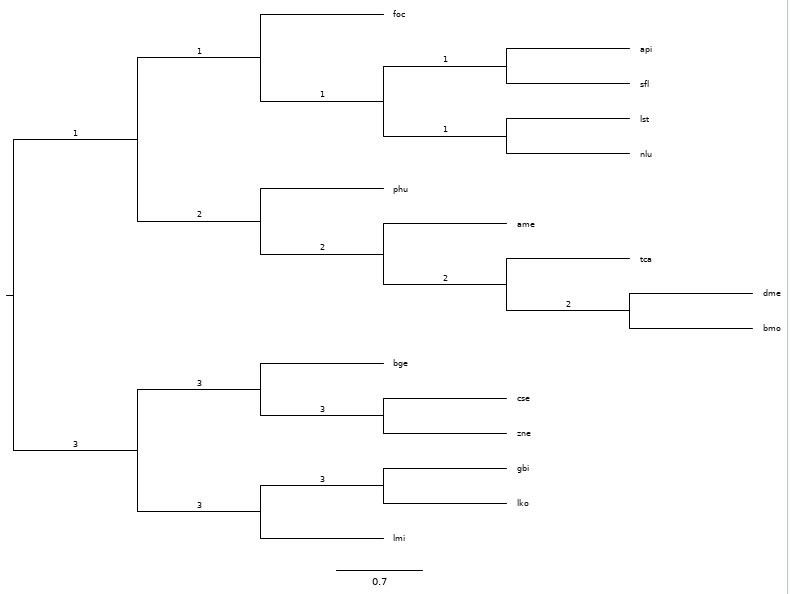

(((1,((1,1)1,(1,1)1)1)1,(2,(2,(2,(2,2)2)2)2)2)1,((3,(3,3)3)3,((3,3)3,3)3)3);




In [7]:
Orthofinder_table_path="/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroups/Orthogroups.GeneCount.tsv"

import csv


largefamiliesfile=open('OGS_Copies_V2.1_largefamilies.tsv', 'w+')

numbertoolarge=0
with open('OGS_Copies_V2.1_filtered.tsv', 'wt') as out_file:
    tsv_writer = csv.writer(out_file, delimiter='\t')
    tsv_writer_largefamily = csv.writer(largefamiliesfile, delimiter='\t')

    with open(Orthofinder_table_path) as tsvfile:
        reader = csv.reader(tsvfile, delimiter='\t')
        for row in reader:
            largestinamily=0
            Copies_family=row[:-1] ## remove last column, "totals"
            if "OG" in Copies_family[0]: # if it is not the first line
                for number in Copies_family[1:]:
                    if int(number)>int(largestinamily):
                        largestinamily=number
                if int(largestinamily)>100:
                    print(Copies_family, "Largest=", largestinamily)
                    numbertoolarge+= 1
                    tsv_writer_largefamily.writerow(['(null)']+row[:-1])
                else:
                    #tsv_writer.writerow(['(null)',"\t".join(row[:-1])])
                    tsv_writer.writerow(['(null)']+row[:-1])
            else:
                #print(row[:-1])#headers
                header="\t".join(row[:-1])
                #lowercaseheader= [item.lower() for item in row[:-1]]
                #tsv_writer.writerow(['Desc']+row[:-1])
                # From Whole name to abbreviation!
                for abb, spp in dictionary_spp_file.items():
                    header = header.replace(spp, abb)
                header2="\t".join(['Desc',header]).split("\t")
                print(header2)   
                tsv_writer.writerow(header2)
                tsv_writer_largefamily.writerow(header2)


print("Number of families  values>100 =", numbertoolarge, " Families filtered")

['Desc', 'Orthogroup', 'Api', 'Ame', 'Bge', 'Bmo', 'Cse', 'Dme', 'Foc', 'Gbi', 'Lst', 'Lko', 'Lmi', 'Nlu', 'Phu', 'Sfl', 'Tca', 'Zne']
['OG0000000', '62', '0', '110', '41', '2', '0', '2', '3', '9', '5', '5', '91', '0', '74', '0', '3'] Largest= 110
['OG0000003', '159', '0', '2', '25', '8', '0', '0', '0', '1', '0', '0', '90', '0', '50', '7', '3'] Largest= 159
['OG0000005', '155', '0', '13', '9', '32', '2', '11', '5', '4', '2', '8', '17', '0', '61', '2', '5'] Largest= 155
['OG0000007', '14', '5', '104', '4', '6', '12', '8', '5', '5', '8', '33', '7', '4', '14', '44', '16'] Largest= 104
['OG0000008', '24', '6', '9', '14', '25', '11', '0', '5', '22', '6', '106', '22', '0', '24', '3', '10'] Largest= 106
['OG0000009', '5', '0', '138', '3', '48', '0', '0', '6', '2', '7', '12', '5', '0', '48', '4', '7'] Largest= 138
['OG0000014', '100', '0', '3', '11', '3', '0', '7', '0', '4', '0', '0', '9', '0', '107', '4', '0'] Largest= 107
['OG0000016', '13', '0', '156', '0', '6', '0', '0', '2', '4', '1', '6'

In [ ]:
"\t".join(['Desc',header])

## Prepare CAFE


I need to prepare the CAFE file with all the scripts

CAFE script:

## CAFE with same lambda

### *CAFE_v2.2.4callibrations_run0*
load -t == Threads
lambda  -t  == difefernt rates birth and death

```
#!cafe
load -i OGS_Copies_V2.1_filtered.tsv -t 8 -l reports/log_V2.2.4callibrations.run0.txt
tree (((Foc:339,((Api:40.38991217,Sfl:40.38991217):254.0640153,(Lst:48.99958058,Nlu:48.99958058):245.4543469):44.5460725):35.82192079,(Phu:362.4323662,(Ame:345,(Tca:314.9941411,(Dme:279.4348203,Bmo:279.4348203):35.55932079):30.00585895):17.43236624):12.38955455):13.58490598,((Bge:112.528622,(Cse:61.00174814,Zne:61.00174814):51.52687381):135.471378,((Gbi:89.20882147,Lko:89.20882147):126.4915381,Lmi:215.7003595):32.29964046):140.4068268);

lambda -s -t  (((1,((1,1)1,(1,1)1)1)1,(1,(1,(1,(1,1)1)1)1)1)1,((1,(1,1)1)1,((1,1)1,1)1)1);

report reports/report_V2.2.4callibrations.run0
```

### Run CAFE

```
~/data_disk/Software/CAFE/release/cafe CAFE_v2.2.4callibrations_run0

```

### Lambda value

From: reports/report_V2.2.4callibrations.run0.cafe

Lambda:	0.00132125



## CAFE with different lambdas

### *CAFE_v2.2.4callibrations_run1*

load -t == Threads
lambda  -t  == difefernt rates birth and death

3 different lambdas:  This tells us that the lineage leading to (and including) Orthopterans+Blattodea  MIGHT have  different  gene  family  evolution  rates than Hemipters, and that Holometabolans+Psocodea might still have different  rates.

```
#!cafe
load -i OGS_Copies_V2.1_filtered.tsv -t 8 -l reports/log_V2.2.4callibrations.run1.txt
tree (((Foc:339,((Api:40.38991217,Sfl:40.38991217):254.0640153,(Lst:48.99958058,Nlu:48.99958058):245.4543469):44.5460725):35.82192079,(Phu:362.4323662,(Ame:345,(Tca:314.9941411,(Dme:279.4348203,Bmo:279.4348203):35.55932079):30.00585895):17.43236624):12.38955455):13.58490598,((Bge:112.528622,(Cse:61.00174814,Zne:61.00174814):51.52687381):135.471378,((Gbi:89.20882147,Lko:89.20882147):126.4915381,Lmi:215.7003595):32.29964046):140.4068268);

lambda -s -t  (((1,((1,1)1,(1,1)1)1)1,(2,(2,(2,(2,2)2)2)2)2)1,((3,(3,3)3)3,((3,3)3,3)3)3);

report reports/report_V2.2.4callibrations.run1
```



### Run CAFE

```
~/data_disk/Software/CAFE/release/cafe CAFE_v2.2.4callibrations_run1

```



## RESULTS run1

Process results 

```
# We provide a convenient script that summarizes the output described above into tables.
# In order to run it, just enter the following command on your shell:
```

```
python cafetutorial_report_analysis.py -i reports/report_V2.2.4callibrations.run1.cafe -o reports/summary_V2.2.4callibrations.run1
```

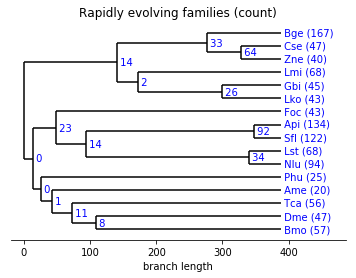

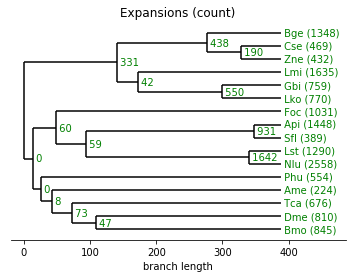

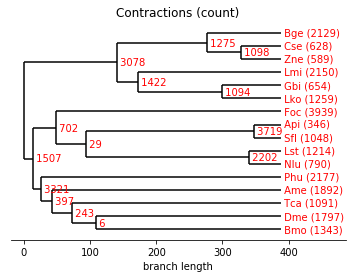

In [12]:
# Draw tree

usedtree="(((Foc:339,((Api:40.38991217,Sfl:40.38991217):254.0640153,(Lst:48.99958058,Nlu:48.99958058):245.4543469):44.5460725):35.82192079,(Phu:362.4323662,(Ame:345,(Tca:314.9941411,(Dme:279.4348203,Bmo:279.4348203):35.55932079):30.00585895):17.43236624):12.38955455):13.58490598,((Bge:112.528622,(Cse:61.00174814,Zne:61.00174814):51.52687381):135.471378,((Gbi:89.20882147,Lko:89.20882147):126.4915381,Lmi:215.7003595):32.29964046):140.4068268)"
cafenodetree='(((Foc<0>,((Api<2>,Sfl<4>)<3>,(Lst<6>,Nlu<8>)<7>)<5>)<1>,(Phu<10>,(Ame<12>,(Tca<14>,(Dme<16>,Bmo<18>)<17>)<15>)<13>)<11>)<9>,((Bge<20>,(Cse<22>,Zne<24>)<23>)<21>,((Gbi<26>,Lko<28>)<27>,Lmi<30>)<29>)<25>)<19>'

# rapid evolving
%run cafetutorial_draw_tree.py -i reports/summary_V2.2.4callibrations.run1_node.txt  -t $usedtree -d $cafenodetree -o reports/summary_v2.2.4callibrations_run1_tree_rapid.png -y Rapid
# expansions
%run cafetutorial_draw_tree.py -i reports/summary_V2.2.4callibrations.run1_node.txt  -t $usedtree -d $cafenodetree -o reports/summary_v2.2.4callibrations_run1_tree_Expansions.png -y Expansions
#Contractions
%run cafetutorial_draw_tree.py -i reports/summary_V2.2.4callibrations.run1_node.txt  -t $usedtree -d $cafenodetree -o reports/summary_v2.2.4callibrations_run1_tree_Contractions.png -y Contractions

## Ignore warnings

### CAFE Comparing models with onevsmultipleλ

*CAFE_v2.2.4callibrations_run_lh*

Tha Lambda value calculated from tree with homogeneous lambda=  0.00132125


```
#!cafe
load -i OGS_Copies_V2.1_filtered.tsv -t 36 -l reports/log_V2.2.4callibrations.run_lh.txt

tree (((Foc:339,((Api:40.38991217,Sfl:40.38991217):254.0640153,(Lst:48.99958058,Nlu:48.99958058):245.4543469):44.5460725):35.82192079,(Phu:362.4323662,(Ame:345,(Tca:314.9941411,(Dme:279.4348203,Bmo:279.4348203):35.55932079):30.00585895):17.43236624):12.38955455):13.58490598,((Bge:112.528622,(Cse:61.00174814,Zne:61.00174814):51.52687381):135.471378,((Gbi:89.20882147,Lko:89.20882147):126.4915381,Lmi:215.7003595):32.29964046):140.4068268);


lambda  -l 0.00132125

genfamily  lh_dir/rnd -t 100

lhtest  -d lh_dir  -t (((1,((1,1)1,(1,1)1)1)1,(2,(2,(2,(2,2)2)2)2)2)1,((3,(3,3)3)3,((3,3)3,3)3)3) -l 0.00132125  -o reports/lhtest_result.txt


```



## Run CAFE

```
~/data_disk/Software/CAFE/release/cafe CAFE_v2.2.4callibrations_run_lh

```

From tutorial:

*Here, the genfamily command simulates the datasets (in the example above, we areasking  for  100  simulations  with-t 100).   It  estimates λ from  the  observed  data  to simulate gene families.  Then the likelihoods of the two competing models are calculatedwith the lhtest function, which takes the multi-λ tree structure, and the estimated λ value using the global-λ model*



## RESULTS from Likelihood test

From file reports/log_V2.2.4callibrations.run0.txt (log-likelihoods ar ethe engatove of  the score): -232998.457504
From file reports/log_V2.2.4callibrations.run1.txt (log-likelihoods ar ethe engatove of  the score) -229913.526930

```
cut -f 2,4 reports/lhtest_result.txt > reports/run4_lk_diffs.txt 

Rscript  lhtest.R reports/run4_lk_diffs.txt 
```

From tutorial

*The  numbers −162576.606204  and −149055.330013  are  the  log-likelihoods  of  theg global-λ and multi-λ models from reports /log_run1.txt and reports/log_run3.txt, respectively  (the  negative  log-likelihoods  are  given  in  these  two  files).   Running  the command  above  creates  a  histogram  with  the  null  distribution  from  the  simulations(reports/lk_null.pdf). Note that the observed likelihood ratio (2×(lnLglobal−lnLmulti)) would fall on the far left tail of the null distribution, yielding a very small p-value, and meaning that thethe probability of a multi-λmodel fitting better than a global-λmodel by chance is verysmall*



The likelihood ratio test (LRT) gives a value of "-6169.861"

2*(-232998.457504-(-229913.526930)) = -6169.861


The p value would be the number of times that the random distributions got a LRT lower than -6169.861 divided by 100 tests.

If the 3 of the 100 tests have a LTR < -6169.861 , pvalue=3/100=0.03





## CAFE check Errors


Since the multi lamda assumptoion was better than the global lambda, I proceed with 

### Calculate error

***The Expansion/Contraction trees*** show ALL teh expanded/contracted famileis, NOT only the significant. In the file *reports/FILE_pub.txt* there is the number of significant in prentesis.


The P-value sed is  "P-value: 0.01" as pointed out at *reports/log_FILE.txt* .


CAFE can correct by errors on genome assembly/annotation

Re-estimate lambdas using this errorr model (MUST be ran with same lambda for whole tree, after getting the error, will run CAFE again with different lambdas but considering the error):

File: CAFE_v2.2.4_calculaterror

```
#!/home/guillem/data_disk/Software/CAFE/release/cafe

load -i OGS_Copies_V2.1_filtered.tsv -t 8 -l reports/log_V2.2.4calculaterror.run1.txt
tree (((Foc:339,((Api:40.38991217,Sfl:40.38991217):254.0640153,(Lst:48.99958058,Nlu:48.99958058):245.4543469):44.5460725):35.82192079,(Phu:362.4323662,(Ame:345,(Tca:314.9941411,(Dme:279.4348203,Bmo:279.4348203):35.55932079):30.00585895):17.43236624):12.38955455):13.58490598,((Bge:112.528622,(Cse:61.00174814,Zne:61.00174814):51.52687381):135.471378,((Gbi:89.20882147,Lko:89.20882147):126.4915381,Lmi:215.7003595):32.29964046):140.4068268);

lambda -s -t  (((1,((1,1)1,(1,1)1)1)1,(1,(1,(1,(1,1)1)1)1)1)1,((1,(1,1)1)1,((1,1)1,1)1)1);

report reports/report_V2.2.4calculaterror.run1

```

Calculate Error model:

```
python  caferror.py -i CAFE_v2.2.4_calculaterror -v 0 -f 1
```

End of log file: caferror_1/caferrorLog.txt   (didnt use the reports/log_V2.2.4calculaterror* files, because obveis tha -d parameter from caferror which i left empty and by default created caferror_1)

```
# =======================================================================
# ************************************
# Score with no errormodel:        232998.456131
# Lambda with no errormodel:       0.00132125965133
# ************************************
# Global Error Estimation:         0.021337890625
# Score with global errormodel:    232459.837134
# Lambda with global errormodel:   0.00126686991522
# ************************************
# =======================================================================

```

File: caferror_1/caferror_default_output.txt

```
ErrorModel	Score
0.4	232998.456131
0.4	258282.847854
0.2	240596.103286
0.1	234642.056371
0.05	232846.652157
0.025	232467.682988
0.0125	232519.290722
0.03125	232514.448907
0.021875	232459.973763
0.0171875	232472.003520
0.04375	232708.562177
0.03046875	232506.518755
0.023828125	232463.438689
0.0205078125	232460.386618
0.02216796875	232460.223555
0.021337890625	232459.837134
0.0209228515625	232459.978250
```


Best error model:  0.021337890625





### RUN CAFE correcting for genome qulaity

File: CAFE_v2.2.4_corrected


```
#!cafe
load -i OGS_Copies_V2.1_filtered.tsv -t 8 -l reports/log_V2.2.4_corrected.txt
tree (((Foc:339,((Api:40.38991217,Sfl:40.38991217):254.0640153,(Lst:48.99958058,Nlu:48.99958058):245.4543469):44.5460725):35.82192079,(Phu:362.4323662,(Ame:345,(Tca:314.9941411,(Dme:279.4348203,Bmo:279.4348203):35.55932079):30.00585895):17.43236624):12.38955455):13.58490598,((Bge:112.528622,(Cse:61.00174814,Zne:61.00174814):51.52687381):135.471378,((Gbi:89.20882147,Lko:89.20882147):126.4915381,Lmi:215.7003595):32.29964046):140.4068268);

lambda -s -t  (((1,((1,1)1,(1,1)1)1)1,(2,(2,(2,(2,2)2)2)2)2)1,((3,(3,3)3)3,((3,3)3,3)3)3);

errormodel  -model caferror_1/cafe_errormodel_0.021337890625.txt  -all


report reports/log_V2.2.4_corrected


```

Run:

```
~/data_disk/Software/CAFE/release/cafe CAFE_v2.2.4_corrected

```

### RESULTS after Correcting by genome quality

Process results 

```
python  cafetutorial_report_analysis.py -i reports/log_V2.2.4_corrected.cafe -o reports/summary_V2.2.4_corrected
```

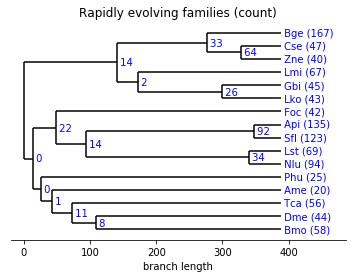

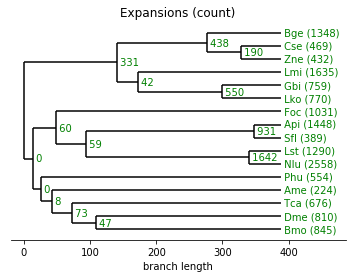

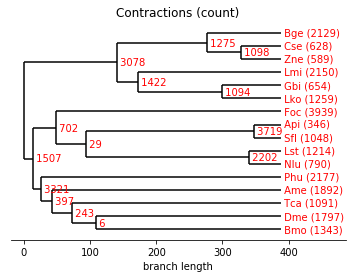

In [14]:
# Draw tree

usedtree="(((Foc:339,((Api:40.38991217,Sfl:40.38991217):254.0640153,(Lst:48.99958058,Nlu:48.99958058):245.4543469):44.5460725):35.82192079,(Phu:362.4323662,(Ame:345,(Tca:314.9941411,(Dme:279.4348203,Bmo:279.4348203):35.55932079):30.00585895):17.43236624):12.38955455):13.58490598,((Bge:112.528622,(Cse:61.00174814,Zne:61.00174814):51.52687381):135.471378,((Gbi:89.20882147,Lko:89.20882147):126.4915381,Lmi:215.7003595):32.29964046):140.4068268)"
cafenodetree='(((Foc<0>,((Api<2>,Sfl<4>)<3>,(Lst<6>,Nlu<8>)<7>)<5>)<1>,(Phu<10>,(Ame<12>,(Tca<14>,(Dme<16>,Bmo<18>)<17>)<15>)<13>)<11>)<9>,((Bge<20>,(Cse<22>,Zne<24>)<23>)<21>,((Gbi<26>,Lko<28>)<27>,Lmi<30>)<29>)<25>)<19>'

# rapid evolving
%run cafetutorial_draw_tree.py -i reports/summary_V2.2.4_corrected_node.txt -t $usedtree -d $cafenodetree -o reports/summary_V2.2.4_corrected_Rapid.png -y Rapid
# expansions
%run cafetutorial_draw_tree.py -i reports/summary_V2.2.4_corrected_node.txt -t $usedtree -d $cafenodetree -o reports/summary_V2.2.4_corrected_Expanisons.png -y Expansions
# #Contractions
%run cafetutorial_draw_tree.py -i reports/summary_V2.2.4_corrected_node.txt -t $usedtree -d $cafenodetree -o reports/summary_V2.2.4_corrected_Contractions.png -y Contractions

## Ignore warnings

## CAFE Large families:

CAFE has issues compiuting lambdas when there are large families (>100 genes). They recomment tho compute those at the end using the previously computed lambdas:

File with gene families with > 100 genes: OGS_Copies_V2.1_largefamilies.tsv

Lambdas from: reports/log_V2.2.4_corrected.cafe


File: CAFE_v2.2.4_largefamilies

```
#!cafe
load -i OGS_Copies_V2.1_largefamilies.tsv -t 8 -l reports/log_V2.2.4_largefamilies.txt
tree (((Foc:339,((Api:40.38991217,Sfl:40.38991217):254.0640153,(Lst:48.99958058,Nlu:48.99958058):245.4543469):44.5460725):35.82192079,(Phu:362.4323662,(Ame:345,(Tca:314.9941411,(Dme:279.4348203,Bmo:279.4348203):35.55932079):30.00585895):17.43236624):12.38955455):13.58490598,((Bge:112.528622,(Cse:61.00174814,Zne:61.00174814):51.52687381):135.471378,((Gbi:89.20882147,Lko:89.20882147):126.4915381,Lmi:215.7003595):32.29964046):140.4068268);

lambda -l 0.00172492 0.000778238 0.00151124 -t  (((1,((1,1)1,(1,1)1)1)1,(2,(2,(2,(2,2)2)2)2)2)1,((3,(3,3)3)3,((3,3)3,3)3)3);

report reports/log_V2.2.4_largefamilies




report reports/log_V2.2.4_largefamilies


```


Run:

```
~/data_disk/Software/CAFE/release/cafe CAFE_v2.2.4_largefamilies

```

### RESULTS for Lareg Families

Process results 

```
python  cafetutorial_report_analysis.py -i reports/log_V2.2.4_largefamilies.cafe -o reports/summary_V2.2.4_largefamilies
```

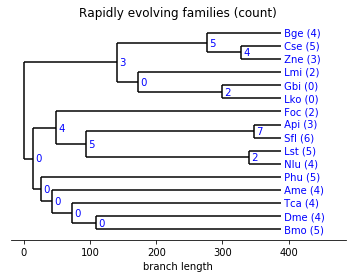

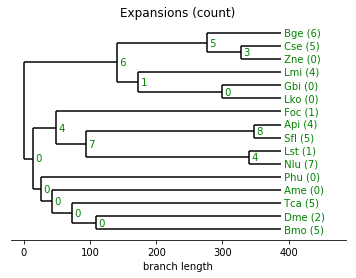

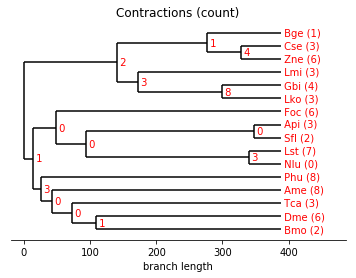

In [2]:
# Draw tree

usedtree="(((Foc:339,((Api:40.38991217,Sfl:40.38991217):254.0640153,(Lst:48.99958058,Nlu:48.99958058):245.4543469):44.5460725):35.82192079,(Phu:362.4323662,(Ame:345,(Tca:314.9941411,(Dme:279.4348203,Bmo:279.4348203):35.55932079):30.00585895):17.43236624):12.38955455):13.58490598,((Bge:112.528622,(Cse:61.00174814,Zne:61.00174814):51.52687381):135.471378,((Gbi:89.20882147,Lko:89.20882147):126.4915381,Lmi:215.7003595):32.29964046):140.4068268)"
cafenodetree='(((Foc<0>,((Api<2>,Sfl<4>)<3>,(Lst<6>,Nlu<8>)<7>)<5>)<1>,(Phu<10>,(Ame<12>,(Tca<14>,(Dme<16>,Bmo<18>)<17>)<15>)<13>)<11>)<9>,((Bge<20>,(Cse<22>,Zne<24>)<23>)<21>,((Gbi<26>,Lko<28>)<27>,Lmi<30>)<29>)<25>)<19>'

# rapid evolving
%run cafetutorial_draw_tree.py -i reports/summary_V2.2.4_largefamilies_node.txt -t $usedtree -d $cafenodetree -o reports/summary_V2.2.4_largefamilies_Rapid.png -y Rapid
# expansions
%run cafetutorial_draw_tree.py -i reports/summary_V2.2.4_largefamilies_node.txt -t $usedtree -d $cafenodetree -o reports/summary_V2.2.4_largefamilies_Expanisons.png -y Expansions
# #Contractions
%run cafetutorial_draw_tree.py -i reports/summary_V2.2.4_largefamilies_node.txt -t $usedtree -d $cafenodetree -o reports/summary_V2.2.4_largefamilies_Contractions.png -y Contractions

## Ignore warnings

In [25]:
## PARSE RESULTS MYSELF

### I can get the OGS significantly gained/lost at any node

#Node="Lko"
Node="<27>"# Gbi+Lko
#Node="<29>"# Gbi+Lko+Lmi

with open("reports/summary_V2.2.4_largefamilies_fams.txt") as f:
    for line in f:
        #print(line)
        #f line.startswith("<"):
            #print(line)
        if line.startswith(Node):
            print(line)
            Expan=0
            Reduc=0
            OGs=line.split(",")
            for items in OGs:
                itemsplit=items.split("[")[1].split("*")[0]
                print(itemsplit)
                if "+" in itemsplit:
                    Expan+= 1
                if "-" in itemsplit:
                    Reduc+= 1
            print("Number of OGs=", len(OGs))
            print("Number of OG Expantions= ",Expan, " Number of OG Contractions= ", Reduc )


<27>:	OG0000007[-9*],OG0000008[-10*]

-9
-10
Number of OGs= 2
Number of OG Expantions=  0  Number of OG Contractions=  2


In [19]:
## Print All the OGs significant in each branch  in files


#CAFE_resultsfile="reports/summary_V2.2.4_largefamilies_fams.txt"
#CAFE_resultsfile="reports/summary_run2_aftererror_fams.txt"


linenum=0
with open(CAFE_resultsfile) as f:
    for line in f:
        linenum=+1
        line=line.rstrip()
        #print(line)
        #f line.startswith("<"):
            #print(line)
        if "<" in line.split("\t")[0] :
            node=line.split(":")[0]
            print("Node= ",node)
            #filename_expa="Expansions_Contractions/Expansion_node"+node+".txt"
            #filename_cont="Expansions_Contractions/Contraction_node"+node+".txt"
            #filename_expa="Expansions_Contractions/Largefamily_Expansion_node"+node+".txt"
            #filename_cont="Expansions_Contractions/Largefamily_Contraction_node"+node+".txt"
            f1= open(filename_expa,"w+")
            f2= open(filename_cont,"w+")
        else:
            node="no node line"
        try:
            #print(line)q
            Expan=0
            Reduc=0
            OGs=line.split(",")

            for items in OGs:
                itemsplit=items.split("[")[1].split("*")[0]
                if "+" in itemsplit:
                    Expan+= 1
                    print(itemsplit,"-->", items.split("[")[0], " -> Expansion")
                    f1.write(items.split("[")[0]+"\t"+itemsplit+"\n")
                if "-" in itemsplit:
                    Reduc+= 1
                    print(itemsplit,"-->",  items.split("[")[0] , " -> Contraction")
                    f2.write(items.split("[")[0]+"\t"+itemsplit+"\n")
            f1.close() 
            f2.close() 
            print("Number of OGs=", len(OGs))
            print("Number of OG Expantions= ",Expan, " Number of OG Contractions= ", Reduc )
        except:
            print("\n Line", linenum, "does not contain a branch:")
            


 Line 1 does not contain a branch:

 Line 1 does not contain a branch:
Node=  Lst<6>
-27 --> Lst<6>:	OG0000000  -> Contraction
-31 --> OG0000003  -> Contraction
-8 --> OG0000005  -> Contraction
-3 --> OG0000014  -> Contraction
-5 --> OG0000016  -> Contraction
Number of OGs= 5
Number of OG Expantions=  0  Number of OG Contractions=  5
Node=  <25>
+6 --> <25>:	OG0000007  -> Expansion
+6 --> OG0000008  -> Expansion
+9 --> OG0000009  -> Expansion
Number of OGs= 3
Number of OG Expantions=  3  Number of OG Contractions=  0
Node=  Nlu<8>
+55 --> Nlu<8>:	OG0000000  -> Expansion
+58 --> OG0000003  -> Expansion
+5 --> OG0000005  -> Expansion
+9 --> OG0000016  -> Expansion
Number of OGs= 4
Number of OG Expantions=  4  Number of OG Contractions=  0
Node=  <21>
+7 --> <21>:	OG0000000  -> Expansion
+5 --> OG0000005  -> Expansion
+10 --> OG0000007  -> Expansion
+31 --> OG0000009  -> Expansion
+13 --> OG0000016  -> Expansion
Number of OGs= 5
Number of OG Expantions=  5  Number of OG Contractions=  0


In [ ]:
filename_cont="Expansions_Contractions/Contraction_node"+node+".txt"    
print("".join(filename_cont) )

# Functional Analysis Expansions and Contractions

After identifying gene ffamily expansions and contractions, I would like to know their functions.


I installed interproscan-5.36-75



In [2]:
## FUNCTIONS later called to annotate OGs

####################
# Function to process Interproscan output
def fucntionSummarizeIpr(OGipr):
    outputdict=dict()
    pfamDesc=dict()
    pfamID=dict()
    godict=dict()
    godictnames=dict()
    seqiddict=dict()
    gos=[]

    #OGipr="OG0000026.fa.tsv"
    file="Expansions_Contractions/Interproscan5_output/%s" %OGipr 

    with open(file)as f:
        for lines in f:
            lines=lines.rstrip()
            fields=lines.split("\t")
            seqid=fields[0]
            #print(seqid)
            if seqid not in seqiddict:
                seqiddict[seqid]=1
                lines=lines.rstrip()
                Org=fields[0].split("_")[0]
                pfam=fields[4]
                if pfam in pfamID:
                    pfamID[pfam]=pfamID[pfam]+1
                else:
                    pfamID[pfam]=1
                    pfamDesc[pfam]=fields[5]

                try:
                    gos=fields[13].split("|")
                    for got in gos:
                        if got in godict:
                            godict[got]=godict[got]+1
                        else:
                            godict[got]=1  

                except:
                    gos="NA"
                    #print("No GO", lines)
                #print(Org, seqid,pfam, pfamd, gos)
    print("Number of seqsin OG:", len(seqiddict))

    for key in pfamID:
        print(key , pfamID[key],pfamDesc[key])
    for key in godict:
        print(key , godict[key],getGOinfo(key)[1], getGOinfo(key)[2])
    for key in godict:
        godictnames[key]= [ godict[key], getGOinfo(key)[1], getGOinfo(key)[2]]
        
    outputdict["pfamids"]=pfamID 
    outputdict["pfamdesc"]=pfamDesc 
    outputdict["goterms"]=godictnames 

    return(outputdict)





#ipprs_cancommand="~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh -d Interproscan5_output --goterms -appl Pfam -i  Contraction_nodeGbi\<6\>.txt" % INPUTFILE


############# function run interproscan and get output
def iprscanfunc(file):
    OGseqsfile=OGseqsfileDir+file
    copyfile(OGseqsfile, "Expansions_Contractions/OG_seqs/"+file)
    replace_stars_command='sed  -i "s/\*//g" %s' % "Expansions_Contractions/OG_seqs/"+file
    print(replace_stars_command)
    subprocess.run(replace_stars_command,shell=True)
    ipprs_cancommand="~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interproscan5_output --goterms -appl Pfam -i  %s" % "Expansions_Contractions/OG_seqs/"+file
    print(ipprs_cancommand)
    subprocess.run(ipprs_cancommand,shell=True)
    
####################
## Function to get GO names and descriptors from GO term
def getGOinfo(GOterm):
    responseBody=[]
    requestURL = "https://www.ebi.ac.uk/QuickGO/services/ontology/go/terms/%s" % GOterm
    r = requests.get(requestURL, headers={ "Accept" : "application/json"})

    if not r.ok:
      r.raise_for_status()
      sys.exit()

    responseBody = r.json()
    
    return(responseBody["results"][0]["id"], responseBody["results"][0]["name"], responseBody["results"][0]["definition"]["text"] )

####################


## I downlaod Dmel Id mapping file  wget ftp://ftp.flybase.net/releases/current/precomputed_files/genes/fbgn_annotation_ID_fb_2019_03.tsv.gz

# Function for given a drosophila gene ID (GCXXX) get the FlyBase id (using ID file) and getting summary using API

#file="OG0000001.fa"
def checkflybase(file):

    data = pd.read_csv("fbgn_annotation_ID_fb_2019_03.tsv", sep="\t",skiprows=4, engine='python') 
    data.head()

    FlybaseDictOut= dict()


    OGseqsfile=OGseqsfileDir+file
    print(OGseqsfile)
    with open(OGseqsfile, "r") as fp:
        for line in fp:
            if line.startswith(">Dme"):
                GCid=line.split("_")[1].strip()
                FlybaseGB=data[data['annotation_ID'] == GCid ]['primary_FBgn#'].item()
                GeneSymbol=data[data['annotation_ID'] == GCid ]['##gene_symbol'].item()
                print(GCid,FlybaseGB)
                #using flybase API to get gene summary
                requestURL = "https://api.flybase.org/api/v1.0/gene/summaries/auto/%s" % FlybaseGB
                try:
                    responseBody = requests.get(requestURL, headers={ "Accept" : "application/json"}).json()
                    GeneSummary=responseBody["resultset"]["result"][0]['summary']
                except:
                    GeneSummary="NA"

                tempdict=dict()
                tempdict={GCid: {"FlybaseGB":FlybaseGB, "GeneSymbol":GeneSymbol, "GeneSummary":GeneSummary}}
                FlybaseDictOut.update(tempdict)
            
    return(FlybaseDictOut)
####################

In [3]:
import pandas as pd
import re, os, subprocess, sys,glob
from shutil import copyfile
import requests, sys, json


OGseqsfileDir='/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/'

CAFE_resultsfile="reports/summary_V2.2.4_corrected_fams.txt"

#CAFE_resultsfile="reports/summary_V2.2.4_largefamilies_fams.txt"


linenum=0
with open(CAFE_resultsfile) as f:
    for line in f:
        done=False
        linenum=linenum+1
        line=line.rstrip()
        #print(line)
        #f line.startswith("<"):
            #print(line)
        if "<" in line.split("\t")[0] :
            node=line.split(":")[0]
            print("\n\n Node= ",node, "\n\n")
#             filename_expa="Expansions_Contractions/Largefamily_Expansion_node"+node+".txt"
#             filename_cont="Expansions_Contractions/Largefamily_Contraction_node"+node+".txt"
            filename_expa="Expansions_Contractions/Expansion_node"+node+".txt"
            filename_cont="Expansions_Contractions/Contraction_node"+node+".txt"
            #### Check if node alreay analyzed (to avou repeating if fails)
            if os.path.exists(filename_expa):
                print("Previously computed!")
                done=True 
                
            else:    
                f1= open(filename_expa,"w+")
                f2= open(filename_cont,"w+")
                f1.write("Number of expanded OG : "+str(line.count("+"))+"\n")
                f2.write("Number of contracted OG : "+str(line.count("-") )+"\n")
        else:
            node="no node line"
        if ">" in line and not "#" in line and done == False:
            print(line)
            Expan=0
            Reduc=0
            OGs=line.split(",")

            for items in OGs:
                try: 
                    itemsplit=items.split("[")[1].split("*")[0]
                except:
                    print("No expantions/contractions")
                    itemsplit="No expansions or contractions"
                if "+" in itemsplit:
                    Expan+= 1
                    print(itemsplit,"-->", items.split("[")[0], " -> Expansion")
                    ### Fucntional Annotation interporscan   
                    fastafilename= re.sub(r'.*OG', 'OG', items)#.split("[")[0]+".fa"
                    fastafilename=fastafilename.split("[")[0]+".fa"
                    f1.write(fastafilename+"\n")
                    f1.write("\tExpansion size: "+itemsplit+"\n")
                    
                    print(fastafilename)
                    iprscanfunc(fastafilename)
                    IPRresults= fucntionSummarizeIpr(fastafilename+".tsv")
                    if len(IPRresults['pfamids'].keys())>0:                   
                        f1.write("\t\t Num. of Genes with the PFAM \t PFAM ID \t PFAM descriptor\n")
                        for key in IPRresults['pfamids']:
                            f1.write("\t\t"+str(IPRresults['pfamids'][key])+"\t"+key+"\t"+str(IPRresults['pfamdesc'][key])+"\n")
                    if len(IPRresults['goterms'].keys())>0:
                        f1.write("\t\t Num. of Genes with the GOterm \t GOterms \t GOterm name \t GO Term descriptor\n")
                        for key in IPRresults['goterms']:
                            f1.write("\t\t"+str(IPRresults['goterms'][key][0])+"\t"+key+"\t"+IPRresults['goterms'][key][1]+"\t"+IPRresults['goterms'][key][2]+"\n")                   
                    FlyBaseInfo=checkflybase(fastafilename)# check if any gene in OG is from dmel and get info from flybase
                    if len(FlyBaseInfo.keys())>0:                   
                        f1.write("\t\t Dmel Genes in OG \t Gene ID \t Flybase ID \t GeneSymbol \t Flybase Summary\n")
                        for key in FlyBaseInfo:
                            f1.write("\t\t\t"+key+"\t"+str(FlyBaseInfo[key]['FlybaseGB'])+"\t"+str(FlyBaseInfo[key]['GeneSymbol'])+"\t"+str(FlyBaseInfo[key]['GeneSummary'])+"\n" )            
                 
                if "-" in itemsplit:
                    Reduc+= 1
                    print(itemsplit,"-->",  items.split("[")[0] , " -> Contraction")


                    ### Fucntional Annotation interporscan   
                    fastafilename= re.sub(r'.*OG', 'OG', items)#.split("[")[0]+".fa"
                    fastafilename=fastafilename.split("[")[0]+".fa"
                    f2.write(fastafilename+"\n")
                    f2.write("\tContraction size: "+itemsplit+"\n")
                    
                    print(fastafilename)
                    iprscanfunc(fastafilename)
                    IPRresults= fucntionSummarizeIpr(fastafilename+".tsv")
                    if len(IPRresults['pfamids'].keys())>0:                   
                        f2.write("\t\t Num. of Genes with the PFAM \t PFAM ID \t PFAM descriptor\n")
                        for key in IPRresults['pfamids']:
                            f2.write("\t\t"+str(IPRresults['pfamids'][key])+"\t"+key+"\t"+str(IPRresults['pfamdesc'][key])+"\n")
                    if len(IPRresults['goterms'].keys())>0:                  
                        f2.write("\t\t Num. of Genes with the GOterm \t GOterms \t GOterm name \t GO Term descriptor\n")
                        for key in IPRresults['goterms']:
                            f2.write("\t\t"+str(IPRresults['goterms'][key][0])+"\t"+key+"\t"+IPRresults['goterms'][key][1]+"\t"+IPRresults['goterms'][key][2]+"\n")                   
                    FlyBaseInfo=checkflybase(fastafilename)# check if any gene in OG is from dmel and get info from flybase
                    if len(FlyBaseInfo.keys())>0:
                        f2.write("\t\t Dmel Genes in OG \t Gene ID \t Flybase ID \t GeneSymbol \t Flybase Summary\n")
                        for key in FlyBaseInfo:
                            f2.write("\t\t\t"+key+"\t"+str(FlyBaseInfo[key]['FlybaseGB'])+"\t"+str(FlyBaseInfo[key]['GeneSymbol'])+"\t"+str(FlyBaseInfo[key]['GeneSummary'])+"\n" )            

                    #f2.write(items.split("[")[0]+"\t"+itemsplit+"\n")
            f1.close() 
            f2.close() 
            print("Number of OGs=", len(OGs))
            print("Number of OG Expantions= ",Expan, " Number of OG Contractions= ", Reduc )
        else:
            print("\n Line", linenum, "does not contain a branch:")
            

        
#ipprs_cancommand="~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh -d Interproscan5_output --goterms -appl Pfam -i  Contraction_nodeGbi\<6\>.txt" % INPUTFILE



 Line 1 does not contain a branch:

 Line 2 does not contain a branch:


 Node=  Lst<6> 


Previously computed!

 Line 3 does not contain a branch:


 Node=  <25> 


Previously computed!

 Line 4 does not contain a branch:


 Node=  Nlu<8> 


Previously computed!

 Line 5 does not contain a branch:


 Node=  <21> 


Previously computed!

 Line 6 does not contain a branch:


 Node=  Tca<14> 


Tca<14>:	OG0000001[+27*],OG0000002[+20*],OG0000006[+17*],OG0000015[+13*],OG0000017[+10*],OG0000026[+8*],OG0000031[+10*],OG0000033[+20*],OG0000038[+29*],OG0000047[+8*],OG0000052[+14*],OG0000054[+5*],OG0000055[+8*],OG0000057[+7*],OG0000058[+11*],OG0000064[+8*],OG0000071[+12*],OG0000072[+13*],OG0000079[+14*],OG0000083[+15*],OG0000087[+8*],OG0000093[+6*],OG0000104[+10*],OG0000111[+7*],OG0000112[+7*],OG0000115[+27*],OG0000119[+5*],OG0000123[+9*],OG0000139[+6*],OG0000149[+5*],OG0000155[+7*],OG0000165[+15*],OG0000166[+15*],OG0000172[+8*],OG0000215[+3*],OG0000222[+7*],OG0000223[+10*],OG0000237[+5*],OG000

Number of seqsin OG: 236
PF00067 234 Cytochrome P450
PF13012 1 Maintenance of mitochondrial structure and function
PF00474 1 Sodium:solute symporter family
GO:0005506 234 iron ion binding Interacting selectively and non-covalently with iron (Fe) ions.
GO:0016705 234 oxidoreductase activity, acting on paired donors, with incorporation or reduction of molecular oxygen Catalysis of an oxidation-reduction (redox) reaction in which hydrogen or electrons are transferred from each of two donors, and molecular oxygen is reduced or incorporated into a donor.
GO:0020037 234 heme binding Interacting selectively and non-covalently with heme, any compound of iron complexed in a porphyrin (tetrapyrrole) ring.
GO:0055114 234 oxidation-reduction process A metabolic process that results in the removal or addition of one or more electrons to or from a substance, with or without the concomitant removal or addition of a proton or protons.
GO:0016020 1 membrane A lipid bilayer along with all the proteins a

/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000047.fa
CG11390 FBgn0011695
CG6642 FBgn0011293
CG9358 FBgn0035089
+14 --> OG0000052  -> Expansion
OG0000052.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0000052.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interproscan5_output --goterms -appl Pfam -i  Expansions_Contractions/OG_seqs/OG0000052.fa
Number of seqsin OG: 116
PF01757 116 Acyltransferase family
GO:0016747 116 transferase activity, transferring acyl groups other than amino-acyl groups Catalysis of the transfer of an acyl group, other than amino-acyl, from one compound (donor) to another (acceptor).
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000052.fa
CG10182 FBgn0

GO:0030246 14 carbohydrate binding Interacting selectively and non-covalently with any carbohydrate, which includes monosaccharides, oligosaccharides and polysaccharides as well as substances derived from monosaccharides by reduction of the carbonyl group (alditols), by oxidation of one or more hydroxy groups to afford the corresponding aldehydes, ketones, or carboxylic acids, or by replacement of one or more hydroxy group(s) by a hydrogen atom. Cyclitols are generally not regarded as carbohydrates.
GO:0005319 1 lipid transporter activity Enables the directed movement of lipids into, out of or within a cell, or between cells.
GO:0006869 1 lipid transport The directed movement of lipids into, out of or within a cell, or between cells, by means of some agent such as a transporter or pore. Lipids are compounds soluble in an organic solvent but not, or sparingly, in an aqueous solvent.
GO:0003676 1 nucleic acid binding Interacting selectively and non-covalently with any nucleic acid.
GO:00

GO:0003676 9 nucleic acid binding Interacting selectively and non-covalently with any nucleic acid.
GO:0008270 1 zinc ion binding Interacting selectively and non-covalently with zinc (Zn) ions.
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000093.fa
CG8089 FBgn0033993
+10 --> OG0000104  -> Expansion
OG0000104.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0000104.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interproscan5_output --goterms -appl Pfam -i  Expansions_Contractions/OG_seqs/OG0000104.fa
Number of seqsin OG: 92
PF00474 92 Sodium:solute symporter family
GO:0016020 92 membrane A lipid bilayer along with all the proteins and protein complexes embedded in it an attached to it.
GO:0022857 92 transmembrane transporter activity Enables the transfer of a substance, usually a specific substan

/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000149.fa
CG1803 FBgn0030362
CG7390 FBgn0038257
+7 --> OG0000155  -> Expansion
OG0000155.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0000155.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interproscan5_output --goterms -appl Pfam -i  Expansions_Contractions/OG_seqs/OG0000155.fa
Number of seqsin OG: 72
PF00112 51 Papain family cysteine protease
PF08127 21 Peptidase family C1 propeptide
GO:0006508 51 proteolysis The hydrolysis of proteins into smaller polypeptides and/or amino acids by cleavage of their peptide bonds.
GO:0008234 51 cysteine-type peptidase activity Catalysis of the hydrolysis of peptide bonds in a polypeptide chain by a mechanism in which the sulfhydryl group of a cysteine residue at the active center acts as a nucleophile.
GO:00041

GO:0005576 8 extracellular region The space external to the outermost structure of a cell. For cells without external protective or external encapsulating structures this refers to space outside of the plasma membrane. This term covers the host cell environment outside an intracellular parasite.
GO:0006030 8 chitin metabolic process The chemical reactions and pathways involving chitin, a linear polysaccharide consisting of beta-(1->4)-linked N-acetyl-D-glucosamine residues.
GO:0008061 8 chitin binding Interacting selectively and non-covalently with chitin, a linear polysaccharide consisting of beta-(1->4)-linked N-acetyl-D-glucosamine residues.
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000223.fa
CG10531 FBgn0034582
CG2054 FBgn0022702
CG3986 FBgn0022700
CG9357 FBgn0034580
+5 --> OG0000237  -> Expansion
OG0000237.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/

CG31975 FBgn0051975
+36 --> OG0000508  -> Expansion
OG0000508.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0000508.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interproscan5_output --goterms -appl Pfam -i  Expansions_Contractions/OG_seqs/OG0000508.fa
Number of seqsin OG: 12
PF02949 12 7tm Odorant receptor
GO:0004984 12 olfactory receptor activity Combining with an odorant and transmitting the signal from one side of the membrane to the other to initiate a change in cell activity in response to detection of smell.
GO:0005549 12 odorant binding Interacting selectively and non-covalently with an odorant, any substance capable of stimulating the sense of smell.
GO:0007608 12 sensory perception of smell The series of events required for an organism to receive an olfactory stimulus, convert it to a molecular signal, and recognize and characterize the signal. Olfaction involves the detection of chemical composition

Number of seqsin OG: 14
PF00067 14 Cytochrome P450
GO:0005506 14 iron ion binding Interacting selectively and non-covalently with iron (Fe) ions.
GO:0016705 14 oxidoreductase activity, acting on paired donors, with incorporation or reduction of molecular oxygen Catalysis of an oxidation-reduction (redox) reaction in which hydrogen or electrons are transferred from each of two donors, and molecular oxygen is reduced or incorporated into a donor.
GO:0020037 14 heme binding Interacting selectively and non-covalently with heme, any compound of iron complexed in a porphyrin (tetrapyrrole) ring.
GO:0055114 14 oxidation-reduction process A metabolic process that results in the removal or addition of one or more electrons to or from a substance, with or without the concomitant removal or addition of a proton or protons.
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0007423.fa


Number of seqsin OG: 101
PF00083 101 Sugar (and other) transporter
GO:0016021 101 integral component of membrane The component of a membrane consisting of the gene products and protein complexes having at least some part of their peptide sequence embedded in the hydrophobic region of the membrane.
GO:0022857 101 transmembrane transporter activity Enables the transfer of a substance, usually a specific substance or a group of related substances, from one side of a membrane to the other.
GO:0055085 101 transmembrane transport The process in which a solute is transported across a lipid bilayer, from one side of a membrane to the other.
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000081.fa
CG10960 FBgn0036316
CG1208 FBgn0037386
CG1380 FBgn0028560
CG6484 FBgn0034247
+11 --> OG0000087  -> Expansion
OG0000087.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0000087.f

Number of seqsin OG: 29
PF00096 8 Zinc finger, C2H2 type
PF13894 1 C2H2-type zinc finger
PF16622 1 zinc-finger C2H2-type
PF00651 18 BTB/POZ domain
PF12874 1 Zinc-finger of C2H2 type
GO:0003676 8 nucleic acid binding Interacting selectively and non-covalently with any nucleic acid.
GO:0005515 18 protein binding Interacting selectively and non-covalently with any protein or protein complex (a complex of two or more proteins that may include other nonprotein molecules).
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000638.fa
+3 --> OG0000765  -> Expansion
OG0000765.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0000765.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interproscan5_output --goterms -appl Pfam -i  Expansions_Contractions/OG_seqs/OG0000765.fa
Number of seqsin OG: 20
PF00115 18 Cytochro

Number of seqsin OG: 246
PF07776 127 Zinc-finger associated domain (zf-AD)
PF00096 80 Zinc finger, C2H2 type
PF12874 9 Zinc-finger of C2H2 type
PF13912 16 C2H2-type zinc finger
PF05605 1 Drought induced 19 protein (Di19), zinc-binding
PF13894 11 C2H2-type zinc finger
PF13913 1 zinc-finger of a C2HC-type
PF12756 1 C2H2 type zinc-finger (2 copies)
GO:0005634 127 nucleus A membrane-bounded organelle of eukaryotic cells in which chromosomes are housed and replicated. In most cells, the nucleus contains all of the cell's chromosomes except the organellar chromosomes, and is the site of RNA synthesis and processing. In some species, or in specialized cell types, RNA metabolism or DNA replication may be absent.
GO:0008270 127 zinc ion binding Interacting selectively and non-covalently with zinc (Zn) ions.
GO:0003676 80 nucleic acid binding Interacting selectively and non-covalently with any nucleic acid.
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Ort

Number of seqsin OG: 24
PF00078 23 Reverse transcriptase (RNA-dependent DNA polymerase)
PF03392 1 Insect pheromone-binding family, A10/OS-D
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000316.fa
+10 --> OG0000637  -> Expansion
OG0000637.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0000637.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interproscan5_output --goterms -appl Pfam -i  Expansions_Contractions/OG_seqs/OG0000637.fa
Number of seqsin OG: 31
PF00096 24 Zinc finger, C2H2 type
PF13912 3 C2H2-type zinc finger
PF12874 4 Zinc-finger of C2H2 type
GO:0003676 24 nucleic acid binding Interacting selectively and non-covalently with any nucleic acid.
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthog

CG1108 FBgn0015574
CG1112 FBgn0015575
CG1121 FBgn0015576
CG1128 FBgn0015577
CG1131 FBgn0015569
CG1257 FBgn0015571
CG2505 FBgn0015570
CG6018 FBgn0034736
CG9858 FBgn0000326
-10 --> OG0000029  -> Contraction
OG0000029.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0000029.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interproscan5_output --goterms -appl Pfam -i  Expansions_Contractions/OG_seqs/OG0000029.fa
Number of seqsin OG: 125
PF13359 124 DDE superfamily endonuclease
PF00096 1 Zinc finger, C2H2 type
GO:0003676 1 nucleic acid binding Interacting selectively and non-covalently with any nucleic acid.
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000029.fa
CG12253 FBgn0026148
CG43088 FBgn0262534
-6 --> OG0000030  -> Contraction
OG0000030.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0000

Number of seqsin OG: 44
PF10551 30 MULE transposase domain
PF00096 9 Zinc finger, C2H2 type
PF08073 1 CHDNT (NUC034) domain
PF12874 1 Zinc-finger of C2H2 type
PF04434 1 SWIM zinc finger
PF13894 1 C2H2-type zinc finger
PF00078 1 Reverse transcriptase (RNA-dependent DNA polymerase)
GO:0003676 9 nucleic acid binding Interacting selectively and non-covalently with any nucleic acid.
GO:0008270 1 zinc ion binding Interacting selectively and non-covalently with zinc (Zn) ions.
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000093.fa
CG8089 FBgn0033993
-4 --> OG0000107  -> Contraction
OG0000107.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0000107.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interproscan5_output --goterms -appl Pfam -i  Expansions_Contractions/OG_seqs/OG0000107.fa
Number of seqsin OG

Number of seqsin OG: 46
PF05485 41 THAP domain
PF13912 1 C2H2-type zinc finger
PF00096 2 Zinc finger, C2H2 type
PF12017 2 Transposase protein
GO:0003676 43 nucleic acid binding Interacting selectively and non-covalently with any nucleic acid.
GO:0004803 2 transposase activity Catalysis of the transposition of transposable elements or transposons. Transposases are involved in recombination required for transposition and are site-specific for the transposon/transposable element.
GO:0006313 2 transposition, DNA-mediated Any process involved in a type of transpositional recombination which occurs via a DNA intermediate.
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000217.fa
-3 --> OG0000224  -> Contraction
OG0000224.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0000224.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expa

Number of seqsin OG: 25
PF00078 10 Reverse transcriptase (RNA-dependent DNA polymerase)
PF09057 9 Second Mitochondria-derived Activator of Caspases
PF14529 5 Endonuclease-reverse transcriptase
PF04721 1 PNGase C-terminal domain, mannose-binding module PAW
GO:0005739 9 mitochondrion A semiautonomous, self replicating organelle that occurs in varying numbers, shapes, and sizes in the cytoplasm of virtually all eukaryotic cells. It is notably the site of tissue respiration.
GO:0006915 9 apoptotic process A programmed cell death process which begins when a cell receives an internal (e.g. DNA damage) or external signal (e.g. an extracellular death ligand), and proceeds through a series of biochemical events (signaling pathway phase) which trigger an execution phase. The execution phase is the last step of an apoptotic process, and is typically characterized by rounding-up of the cell, retraction of pseudopodes, reduction of cellular volume (pyknosis), chromatin condensation, nuclear fragmen

/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000447.fa
-2 --> OG0000475  -> Contraction
OG0000475.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0000475.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interproscan5_output --goterms -appl Pfam -i  Expansions_Contractions/OG_seqs/OG0000475.fa
Number of seqsin OG: 17
PF00443 2 Ubiquitin carboxyl-terminal hydrolase
PF14529 9 Endonuclease-reverse transcriptase
PF12796 5 Ankyrin repeats (3 copies)
PF00023 1 Ankyrin repeat
GO:0016579 2 protein deubiquitination The removal of one or more ubiquitin groups from a protein.
GO:0036459 2 thiol-dependent ubiquitinyl hydrolase activity Catalysis of the thiol-dependent hydrolysis of an ester, thioester, amide, peptide or isopeptide bond formed by the C-terminal glycine of ubiquitin.
GO:0005515 1 protein bindin

Number of seqsin OG: 10
PF00078 10 Reverse transcriptase (RNA-dependent DNA polymerase)
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000596.fa
-2 --> OG0000720  -> Contraction
OG0000720.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0000720.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interproscan5_output --goterms -appl Pfam -i  Expansions_Contractions/OG_seqs/OG0000720.fa
Number of seqsin OG: 0
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000720.fa
-2 --> OG0000721  -> Contraction
OG0000721.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0000721.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interp

Number of seqsin OG: 22
PF16087 22 Helix-turn-helix domain (DUF4817)
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0001364.fa
CG18367 FBgn0034460
-2 --> OG0001761  -> Contraction
OG0001761.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0001761.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interproscan5_output --goterms -appl Pfam -i  Expansions_Contractions/OG_seqs/OG0001761.fa
Number of seqsin OG: 0
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0001761.fa
-2 --> OG0002608  -> Contraction
OG0002608.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0002608.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Inter

+7 --> OG0000080  -> Expansion
OG0000080.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0000080.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interproscan5_output --goterms -appl Pfam -i  Expansions_Contractions/OG_seqs/OG0000080.fa
Number of seqsin OG: 66
PF10551 38 MULE transposase domain
PF04500 26 FLYWCH zinc finger domain
PF00651 1 BTB/POZ domain
PF13920 1 Zinc finger, C3HC4 type (RING finger)
GO:0005515 1 protein binding Interacting selectively and non-covalently with any protein or protein complex (a complex of two or more proteins that may include other nonprotein molecules).
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000080.fa
CG42770 FBgn0261838
CG44881 FBgn0266175
+8 --> OG0000089  -> Expansion
OG0000089.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0000089.fa
~/data_dis

GO:0055085 80 transmembrane transport The process in which a solute is transported across a lipid bilayer, from one side of a membrane to the other.
GO:0016021 55 integral component of membrane The component of a membrane consisting of the gene products and protein complexes having at least some part of their peptide sequence embedded in the hydrophobic region of the membrane.
GO:0022857 55 transmembrane transporter activity Enables the transfer of a substance, usually a specific substance or a group of related substances, from one side of a membrane to the other.
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000116.fa
CG4630 FBgn0033809
CG7442 FBgn0037140
CG7458 FBgn0037144
+21 --> OG0000123  -> Expansion
OG0000123.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0000123.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d E

Number of seqsin OG: 9
PF00665 8 Integrase core domain
PF00385 1 Chromo (CHRromatin Organisation MOdifier) domain
GO:0015074 8 DNA integration The process in which a segment of DNA is incorporated into another, usually larger, DNA molecule such as a chromosome.
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000380.fa
+15 --> OG0000499  -> Expansion
OG0000499.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0000499.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interproscan5_output --goterms -appl Pfam -i  Expansions_Contractions/OG_seqs/OG0000499.fa
Number of seqsin OG: 19
PF05970 13 PIF1-like helicase
PF02689 5 Helicase
PF13538 1 UvrD-like helicase C-terminal domain
GO:0000723 13 telomere maintenance Any process that contributes to the maintenance of proper telomeric length and structure by affec

Number of seqsin OG: 27
PF00651 27 BTB/POZ domain
GO:0005515 27 protein binding Interacting selectively and non-covalently with any protein or protein complex (a complex of two or more proteins that may include other nonprotein molecules).
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000927.fa
+6 --> OG0000928  -> Expansion
OG0000928.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0000928.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interproscan5_output --goterms -appl Pfam -i  Expansions_Contractions/OG_seqs/OG0000928.fa
Number of seqsin OG: 22
PF05699 7 hAT family C-terminal dimerisation region
PF04937 15 Protein of unknown function (DUF 659)
GO:0046983 7 protein dimerization activity The formation of a protein dimer, a macromolecular structure consists of two noncovalently associated ident

Number of seqsin OG: 0
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0007624.fa
-10 --> OG0000001  -> Contraction
OG0000001.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0000001.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interproscan5_output --goterms -appl Pfam -i  Expansions_Contractions/OG_seqs/OG0000001.fa
Number of seqsin OG: 345
PF02949 343 7tm Odorant receptor
PF00179 1 Ubiquitin-conjugating enzyme
PF02779 1 Transketolase, pyrimidine binding domain
GO:0004984 343 olfactory receptor activity Combining with an odorant and transmitting the signal from one side of the membrane to the other to initiate a change in cell activity in response to detection of smell.
GO:0005549 343 odorant binding Interacting selectively and non-covalently with an odorant, any substance capable of stimulating 

Number of seqsin OG: 259
PF00732 135 GMC oxidoreductase
PF05199 124 GMC oxidoreductase
GO:0016614 259 oxidoreductase activity, acting on CH-OH group of donors Catalysis of an oxidation-reduction (redox) reaction in which a CH-OH group act as a hydrogen or electron donor and reduces a hydrogen or electron acceptor.
GO:0050660 135 flavin adenine dinucleotide binding Interacting selectively and non-covalently with FAD, flavin-adenine dinucleotide, the coenzyme or the prosthetic group of various flavoprotein oxidoreductase enzymes, in either the oxidized form, FAD, or the reduced form, FADH2.
GO:0055114 259 oxidation-reduction process A metabolic process that results in the removal or addition of one or more electrons to or from a substance, with or without the concomitant removal or addition of a proton or protons.
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000011.fa


CG31098 FBgn0051098
CG31099 FBgn0051099
CG31102 FBgn0051102
CG31288 FBgn0051288
CG31380 FBgn0051380
CG32195 FBgn0052195
CG33301 FBgn0053301
CG6830 FBgn0037934
CG6834 FBgn0037935
CG6908 FBgn0037936
CG7135 FBgn0030895
CG9497 FBgn0031800
CG9498 FBgn0031801
+15 --> OG0000027  -> Expansion
OG0000027.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0000027.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interproscan5_output --goterms -appl Pfam -i  Expansions_Contractions/OG_seqs/OG0000027.fa
Number of seqsin OG: 164
PF13843 142 Transposase IS4
PF13842 20 DDE_Tnp_1-like zinc-ribbon
PF05485 1 THAP domain
PF13894 1 C2H2-type zinc finger
GO:0003676 1 nucleic acid binding Interacting selectively and non-covalently with any nucleic acid.
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000027.fa
CG9839 FBgn0037

GO:0015276 75 ligand-gated ion channel activity Enables the transmembrane transfer of an ion by a channel that opens when a specific ligand has been bound by the channel complex or one of its constituent parts.
GO:0016020 80 membrane A lipid bilayer along with all the proteins and protein complexes embedded in it an attached to it.
GO:0004970 5 ionotropic glutamate receptor activity Catalysis of the transmembrane transfer of an ion by a channel that opens when glutamate has been bound by the channel complex or one of its constituent parts.
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000053.fa
CG10101 FBgn0037501
CG10633 FBgn0035604
CG14076 FBgn0036829
+19 --> OG0000054  -> Expansion
OG0000054.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0000054.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions

Number of seqsin OG: 93
PF03184 73 DDE superfamily endonuclease
PF05225 11 helix-turn-helix, Psq domain
PF03221 9 Tc5 transposase DNA-binding domain
GO:0003676 73 nucleic acid binding Interacting selectively and non-covalently with any nucleic acid.
GO:0003677 11 DNA binding Any molecular function by which a gene product interacts selectively and non-covalently with DNA (deoxyribonucleic acid).
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000069.fa
+4 --> OG0000072  -> Expansion
OG0000072.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0000072.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interproscan5_output --goterms -appl Pfam -i  Expansions_Contractions/OG_seqs/OG0000072.fa
Number of seqsin OG: 110
PF00858 110 Amiloride-sensitive sodium channel
GO:0005272 110 sodium channel activity Enable

GO:0008527 88 taste receptor activity Combining with soluble compounds to initiate a change in cell activity. These receptors are responsible for the sense of taste.
GO:0016021 89 integral component of membrane The component of a membrane consisting of the gene products and protein complexes having at least some part of their peptide sequence embedded in the hydrophobic region of the membrane.
GO:0050912 88 detection of chemical stimulus involved in sensory perception of taste The series of events involved in the perception of taste in which a gustatory chemical stimulus is received and converted into a molecular signal.
GO:0050909 1 sensory perception of taste The series of events required for an organism to receive a gustatory stimulus, convert it to a molecular signal, and recognize and characterize the signal. Gustation involves the direct detection of chemical composition, usually through contact with chemoreceptor cells. This is a neurological process.
/home/guillem/data_disk/Cri

Number of seqsin OG: 56
PF16087 56 Helix-turn-helix domain (DUF4817)
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000154.fa
+3 --> OG0000155  -> Expansion
OG0000155.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0000155.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interproscan5_output --goterms -appl Pfam -i  Expansions_Contractions/OG_seqs/OG0000155.fa
Number of seqsin OG: 72
PF00112 51 Papain family cysteine protease
PF08127 21 Peptidase family C1 propeptide
GO:0006508 51 proteolysis The hydrolysis of proteins into smaller polypeptides and/or amino acids by cleavage of their peptide bonds.
GO:0008234 51 cysteine-type peptidase activity Catalysis of the hydrolysis of peptide bonds in a polypeptide chain by a mechanism in which the sulfhydryl group of a cysteine residue at the active center 

GO:0006814 64 sodium ion transport The directed movement of sodium ions (Na+) into, out of or within a cell, or between cells, by means of some agent such as a transporter or pore.
GO:0016020 64 membrane A lipid bilayer along with all the proteins and protein complexes embedded in it an attached to it.
GO:0016021 1 integral component of membrane The component of a membrane consisting of the gene products and protein complexes having at least some part of their peptide sequence embedded in the hydrophobic region of the membrane.
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000185.fa
CG12048 FBgn0039675
CG18110 FBgn0039677
CG18287 FBgn0039679
CG34058 FBgn0065109
CG7577 FBgn0039676
CG9499 FBgn0031802
CG9501 FBgn0031803
+44 --> OG0000215  -> Expansion
OG0000215.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0000215.fa
~/data_disk/Software/my_interproscan/interpro

/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000231.fa
CG15336 FBgn0030009
CG15710 FBgn0034120
CG17801 FBgn0038550
CG17803 FBgn0038547
CG17806 FBgn0038548
CG3847 FBgn0029867
CG4318 FBgn0030455
CG6689 FBgn0037877
+7 --> OG0000235  -> Expansion
OG0000235.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0000235.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interproscan5_output --goterms -appl Pfam -i  Expansions_Contractions/OG_seqs/OG0000235.fa
Number of seqsin OG: 54
PF00083 53 Sugar (and other) transporter
PF07690 1 Major Facilitator Superfamily
GO:0016021 53 integral component of membrane The component of a membrane consisting of the gene products and protein complexes having at least some part of their peptide sequence embedded in the hydrophobic region of the membrane.
GO:0022857 53 transmem

Number of seqsin OG: 30
PF00651 1 BTB/POZ domain
PF00589 28 Phage integrase family
PF16794 1 Fibronectin-III type domain
GO:0005515 2 protein binding Interacting selectively and non-covalently with any protein or protein complex (a complex of two or more proteins that may include other nonprotein molecules).
GO:0003677 28 DNA binding Any molecular function by which a gene product interacts selectively and non-covalently with DNA (deoxyribonucleic acid).
GO:0006310 28 DNA recombination Any process in which a new genotype is formed by reassortment of genes resulting in gene combinations different from those that were present in the parents. In eukaryotes genetic recombination can occur by chromosome assortment, intrachromosomal recombination, or nonreciprocal interchromosomal recombination. Interchromosomal recombination occurs by crossing over. In bacteria it may occur by genetic transformation, conjugation, transduction, or F-duction.
GO:0015074 28 DNA integration The process in which 

GO:0005515 5 protein binding Interacting selectively and non-covalently with any protein or protein complex (a complex of two or more proteins that may include other nonprotein molecules).
GO:0007154 2 cell communication Any process that mediates interactions between a cell and its surroundings. Encompasses interactions such as signaling or attachment between one cell and another cell, between a cell and an extracellular matrix, or between a cell and any other aspect of its environment.
GO:0016021 2 integral component of membrane The component of a membrane consisting of the gene products and protein complexes having at least some part of their peptide sequence embedded in the hydrophobic region of the membrane.
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000378.fa
+5 --> OG0000393  -> Expansion
OG0000393.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG000039

Number of seqsin OG: 36
PF13843 34 Transposase IS4
PF13837 1 Myb/SANT-like DNA-binding domain
PF13842 1 DDE_Tnp_1-like zinc-ribbon
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000498.fa
+6 --> OG0000499  -> Expansion
OG0000499.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0000499.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interproscan5_output --goterms -appl Pfam -i  Expansions_Contractions/OG_seqs/OG0000499.fa
Number of seqsin OG: 19
PF05970 13 PIF1-like helicase
PF02689 5 Helicase
PF13538 1 UvrD-like helicase C-terminal domain
GO:0000723 13 telomere maintenance Any process that contributes to the maintenance of proper telomeric length and structure by affecting and monitoring the activity of telomeric proteins, the length of telomeric DNA and the replication and repair of the DNA. These

GO:0005549 1 odorant binding Interacting selectively and non-covalently with an odorant, any substance capable of stimulating the sense of smell.
GO:0007608 1 sensory perception of smell The series of events required for an organism to receive an olfactory stimulus, convert it to a molecular signal, and recognize and characterize the signal. Olfaction involves the detection of chemical composition of an organism's ambient medium by chemoreceptors. This is a neurological process.
GO:0016020 1 membrane A lipid bilayer along with all the proteins and protein complexes embedded in it an attached to it.
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000525.fa
CG14478 FBgn0028953
+21 --> OG0000559  -> Expansion
OG0000559.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0000559.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Exp

Number of seqsin OG: 24
PF12937 14 F-box-like
PF00646 10 F-box domain
GO:0005515 24 protein binding Interacting selectively and non-covalently with any protein or protein complex (a complex of two or more proteins that may include other nonprotein molecules).
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000671.fa
+4 --> OG0000674  -> Expansion
OG0000674.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0000674.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interproscan5_output --goterms -appl Pfam -i  Expansions_Contractions/OG_seqs/OG0000674.fa
Number of seqsin OG: 5
PF00657 2 GDSL-like Lipase/Acylhydrolase
PF02902 1 Ulp1 protease family, C-terminal catalytic domain
PF04500 2 FLYWCH zinc finger domain
GO:0016788 2 hydrolase activity, acting on ester bonds Catalysis of the hydrolysis of any ester

/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000762.fa
+3 --> OG0000763  -> Expansion
OG0000763.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0000763.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interproscan5_output --goterms -appl Pfam -i  Expansions_Contractions/OG_seqs/OG0000763.fa
Number of seqsin OG: 27
PF00135 27 Carboxylesterase family
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000763.fa
+6 --> OG0000813  -> Expansion
OG0000813.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0000813.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interproscan5_output --goterms -appl Pfam -i  Expansions_Contr

Number of seqsin OG: 0
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0001126.fa
+13 --> OG0001210  -> Expansion
OG0001210.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0001210.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interproscan5_output --goterms -appl Pfam -i  Expansions_Contractions/OG_seqs/OG0001210.fa
Number of seqsin OG: 8
PF13843 7 Transposase IS4
PF13842 1 DDE_Tnp_1-like zinc-ribbon
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0001210.fa
+21 --> OG0001228  -> Expansion
OG0001228.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0001228.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interprosc

Number of seqsin OG: 16
PF00067 16 Cytochrome P450
GO:0005506 16 iron ion binding Interacting selectively and non-covalently with iron (Fe) ions.
GO:0016705 16 oxidoreductase activity, acting on paired donors, with incorporation or reduction of molecular oxygen Catalysis of an oxidation-reduction (redox) reaction in which hydrogen or electrons are transferred from each of two donors, and molecular oxygen is reduced or incorporated into a donor.
GO:0020037 16 heme binding Interacting selectively and non-covalently with heme, any compound of iron complexed in a porphyrin (tetrapyrrole) ring.
GO:0055114 16 oxidation-reduction process A metabolic process that results in the removal or addition of one or more electrons to or from a substance, with or without the concomitant removal or addition of a proton or protons.
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0001717.fa


/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0002615.fa
+9 --> OG0003368  -> Expansion
OG0003368.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0003368.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interproscan5_output --goterms -appl Pfam -i  Expansions_Contractions/OG_seqs/OG0003368.fa
Number of seqsin OG: 0
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0003368.fa
+12 --> OG0003427  -> Expansion
OG0003427.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0003427.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interproscan5_output --goterms -appl Pfam -i  Expansions_Contractions/OG_seqs/OG0003427.fa
Number

Number of seqsin OG: 13
PF08395 13 7tm Chemosensory receptor
GO:0016021 13 integral component of membrane The component of a membrane consisting of the gene products and protein complexes having at least some part of their peptide sequence embedded in the hydrophobic region of the membrane.
GO:0050909 13 sensory perception of taste The series of events required for an organism to receive a gustatory stimulus, convert it to a molecular signal, and recognize and characterize the signal. Gustation involves the direct detection of chemical composition, usually through contact with chemoreceptor cells. This is a neurological process.
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0007779.fa
+12 --> OG0007780  -> Expansion
OG0007780.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0007780.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f

Number of seqsin OG: 31
PF00096 24 Zinc finger, C2H2 type
PF13912 3 C2H2-type zinc finger
PF12874 4 Zinc-finger of C2H2 type
GO:0003676 24 nucleic acid binding Interacting selectively and non-covalently with any nucleic acid.
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000637.fa
Number of OGs= 167
Number of OG Expantions=  164  Number of OG Contractions=  3


 Node=  Phu<10> 


Phu<10>:	OG0000316[+9*],OG0000411[+5*],OG0001529[+17*],OG0000001[-15*],OG0000002[-12*],OG0000004[-8*],OG0000006[-13*],OG0000010[-9*],OG0000013[-9*],OG0000022[-8*],OG0000024[-7*],OG0000026[-6*],OG0000029[-5*],OG0000031[-6*],OG0000033[-6*],OG0000036[-6*],OG0000038[-6*],OG0000048[-7*],OG0000059[-5*],OG0000061[-5*],OG0000072[-5*],OG0000083[-5*],OG0000089[-5*],OG0000111[-5*],OG0000167[-4*]
+9 --> Phu<10>:	OG0000316  -> Expansion
OG0000316.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0000

CG9283 FBgn0036878
CG9290 FBgn0036879
-13 --> OG0000006  -> Contraction
OG0000006.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0000006.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interproscan5_output --goterms -appl Pfam -i  Expansions_Contractions/OG_seqs/OG0000006.fa
Number of seqsin OG: 312
PF00201 312 UDP-glucoronosyl and UDP-glucosyl transferase
GO:0016758 312 transferase activity, transferring hexosyl groups Catalysis of the transfer of a hexosyl group from one compound (donor) to another (acceptor).
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000006.fa
CG10168 FBgn0039087
CG10170 FBgn0039085
CG10178 FBgn0032684
CG13270 FBgn0040262
CG15661 FBgn0034605
CG15902 FBgn0040250
CG17200 FBgn0040253
CG17322 FBgn0027070
CG17323 FBgn0032713
CG17324 FBgn0027074
CG18578 FBgn0040259
CG2788 FBgn0

/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000029.fa
CG12253 FBgn0026148
CG43088 FBgn0262534
-6 --> OG0000031  -> Contraction
OG0000031.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0000031.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interproscan5_output --goterms -appl Pfam -i  Expansions_Contractions/OG_seqs/OG0000031.fa
Number of seqsin OG: 168
PF00106 166 short chain dehydrogenase
PF01130 1 CD36 family
PF01370 1 NAD dependent epimerase/dehydratase family
GO:0016020 1 membrane A lipid bilayer along with all the proteins and protein complexes embedded in it an attached to it.
GO:0003824 1 catalytic activity Catalysis of a biochemical reaction at physiological temperatures. In biologically catalyzed reactions, the reactants are known as substrates, and the catalysts are naturally occurr

GO:0005975 106 carbohydrate metabolic process The chemical reactions and pathways involving carbohydrates, any of a group of organic compounds based of the general formula Cx(H2O)y. Includes the formation of carbohydrate derivatives by the addition of a carbohydrate residue to another molecule.
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000059.fa
CG11669 FBgn0033296
CG14934 FBgn0032381
CG14935 FBgn0032382
CG2791 FBgn0037533
CG30359 FBgn0050359
CG30360 FBgn0050360
CG8690 FBgn0033297
CG8693 FBgn0033294
CG8694 FBgn0002569
CG8695 FBgn0002571
CG8696 FBgn0002570
-5 --> OG0000061  -> Contraction
OG0000061.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0000061.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interproscan5_output --goterms -appl Pfam -i  Expansions_Contractions/OG_seqs/OG0000061.fa
Num

Number of seqsin OG: 345
PF02949 343 7tm Odorant receptor
PF00179 1 Ubiquitin-conjugating enzyme
PF02779 1 Transketolase, pyrimidine binding domain
GO:0004984 343 olfactory receptor activity Combining with an odorant and transmitting the signal from one side of the membrane to the other to initiate a change in cell activity in response to detection of smell.
GO:0005549 343 odorant binding Interacting selectively and non-covalently with an odorant, any substance capable of stimulating the sense of smell.
GO:0007608 343 sensory perception of smell The series of events required for an organism to receive an olfactory stimulus, convert it to a molecular signal, and recognize and characterize the signal. Olfaction involves the detection of chemical composition of an organism's ambient medium by chemoreceptors. This is a neurological process.
GO:0016020 343 membrane A lipid bilayer along with all the proteins and protein complexes embedded in it an attached to it.
/home/guillem/data_disk/Cri

CG1082 FBgn0015572
CG1089 FBgn0261393
CG1108 FBgn0015574
CG1112 FBgn0015575
CG1121 FBgn0015576
CG1128 FBgn0015577
CG1131 FBgn0015569
CG1257 FBgn0015571
CG2505 FBgn0015570
CG6018 FBgn0034736
CG9858 FBgn0000326
+13 --> OG0000027  -> Expansion
OG0000027.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0000027.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interproscan5_output --goterms -appl Pfam -i  Expansions_Contractions/OG_seqs/OG0000027.fa
Number of seqsin OG: 164
PF13843 142 Transposase IS4
PF13842 20 DDE_Tnp_1-like zinc-ribbon
PF05485 1 THAP domain
PF13894 1 C2H2-type zinc finger
GO:0003676 1 nucleic acid binding Interacting selectively and non-covalently with any nucleic acid.
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000027.fa
CG9839 FBgn0037633
+11 --> OG0000028  -> Expansion
OG0000028

/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000076.fa
CG17949 FBgn0061209
CG33868 FBgn0053868
CG33870 FBgn0053870
CG33872 FBgn0053872
CG33874 FBgn0053874
CG33876 FBgn0053876
CG33878 FBgn0053878
CG33880 FBgn0053880
CG33882 FBgn0053882
CG33884 FBgn0053884
CG33886 FBgn0053886
CG33888 FBgn0053888
CG33890 FBgn0053890
CG33892 FBgn0053892
CG33894 FBgn0053894
CG33896 FBgn0053896
CG33898 FBgn0053898
CG33900 FBgn0053900
CG33902 FBgn0053902
CG33904 FBgn0053904
CG33906 FBgn0053906
CG33908 FBgn0053908
CG33910 FBgn0053910
+9 --> OG0000086  -> Expansion
OG0000086.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0000086.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interproscan5_output --goterms -appl Pfam -i  Expansions_Contractions/OG_seqs/OG0000086.fa
Number of seqsin OG: 94
PF10545 66 Alcohol dehydrogenas

Number of seqsin OG: 4
PF00078 3 Reverse transcriptase (RNA-dependent DNA polymerase)
PF14529 1 Endonuclease-reverse transcriptase
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000228.fa
+5 --> OG0000230  -> Expansion
OG0000230.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0000230.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interproscan5_output --goterms -appl Pfam -i  Expansions_Contractions/OG_seqs/OG0000230.fa
Number of seqsin OG: 42
PF00061 36 Lipocalin / cytosolic fatty-acid binding protein family
PF14713 1 Domain of unknown function (DUF4464)
PF14651 5 Lipocalin / cytosolic fatty-acid binding protein family
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000230.fa
CG67

Number of seqsin OG: 13
PF00075 12 RNase H
PF14529 1 Endonuclease-reverse transcriptase
GO:0003676 12 nucleic acid binding Interacting selectively and non-covalently with any nucleic acid.
GO:0004523 12 RNA-DNA hybrid ribonuclease activity Catalysis of the endonucleolytic cleavage of RNA in RNA-DNA hybrids to 5'-phosphomonoesters.
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000427.fa
+36 --> OG0000428  -> Expansion
OG0000428.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0000428.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interproscan5_output --goterms -appl Pfam -i  Expansions_Contractions/OG_seqs/OG0000428.fa
Number of seqsin OG: 38
PF00096 21 Zinc finger, C2H2 type
PF12756 2 C2H2 type zinc-finger (2 copies)
PF13894 3 C2H2-type zinc finger
PF13912 5 C2H2-type zinc finger
PF05605 1 Drough

Number of seqsin OG: 26
PF03564 21 Protein of unknown function (DUF1759)
PF05585 5 Putative peptidase (DUF1758)
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0001029.fa
+15 --> OG0001040  -> Expansion
OG0001040.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0001040.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interproscan5_output --goterms -appl Pfam -i  Expansions_Contractions/OG_seqs/OG0001040.fa
Number of seqsin OG: 16
PF01757 16 Acyltransferase family
GO:0016747 16 transferase activity, transferring acyl groups other than amino-acyl groups Catalysis of the transfer of an acyl group, other than amino-acyl, from one compound (donor) to another (acceptor).
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Ju

Number of seqsin OG: 13
PF00201 13 UDP-glucoronosyl and UDP-glucosyl transferase
GO:0016758 13 transferase activity, transferring hexosyl groups Catalysis of the transfer of a hexosyl group from one compound (donor) to another (acceptor).
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0007816.fa
-5 --> OG0000023  -> Contraction
OG0000023.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0000023.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interproscan5_output --goterms -appl Pfam -i  Expansions_Contractions/OG_seqs/OG0000023.fa
Number of seqsin OG: 198
PF02958 198 Ecdysteroid kinase
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000023.fa
CG10513 FBgn0039311
CG10514 FBgn0039312
CG

GO:0006508 266 proteolysis The hydrolysis of proteins into smaller polypeptides and/or amino acids by cleavage of their peptide bonds.
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000010.fa
CG10405 FBgn0038431
CG10586 FBgn0037036
CG11037 FBgn0037038
CG11192 FBgn0034507
CG12350 FBgn0043470
CG12351 FBgn0010358
CG12385 FBgn0011555
CG12386 FBgn0011554
CG12387 FBgn0011556
CG12388 FBgn0043471
CG12951 FBgn0037677
CG1304 FBgn0031141
CG13430 FBgn0034518
CG14780 FBgn0025383
CG16749 FBgn0037678
CG16998 FBgn0035795
CG17012 FBgn0031406
CG17234 FBgn0042187
CG17239 FBgn0042186
CG17240 FBgn0011832
CG17475 FBgn0038481
CG17477 FBgn0038479
CG17571 FBgn0259998
CG18125 FBgn0264253
CG18211 FBgn0010357
CG18444 FBgn0003863
CG18681 FBgn0010425
CG2071 FBgn0011834
CG30025 FBgn0050025
CG30028 FBgn0010359
CG30031 FBgn0050031
CG31265 FBgn0051265
CG31266 FBgn0051266
CG31267 FBgn0051267
CG31269 FBg

Number of seqsin OG: 124
PF00232 124 Glycosyl hydrolase family 1
GO:0004553 124 hydrolase activity, hydrolyzing O-glycosyl compounds Catalysis of the hydrolysis of any O-glycosyl bond.
GO:0005975 124 carbohydrate metabolic process The chemical reactions and pathways involving carbohydrates, any of a group of organic compounds based of the general formula Cx(H2O)y. Includes the formation of carbohydrate derivatives by the addition of a carbohydrate residue to another molecule.
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000057.fa
CG9701 FBgn0036659
+9 --> OG0000060  -> Expansion
OG0000060.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0000060.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interproscan5_output --goterms -appl Pfam -i  Expansions_Contractions/OG_seqs/OG0000060.fa
Number of seqsi

Number of seqsin OG: 39
PF10551 28 MULE transposase domain
PF04500 10 FLYWCH zinc finger domain
PF02892 1 BED zinc finger
GO:0003677 1 DNA binding Any molecular function by which a gene product interacts selectively and non-covalently with DNA (deoxyribonucleic acid).
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000094.fa
+4 --> OG0000118  -> Expansion
OG0000118.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0000118.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interproscan5_output --goterms -appl Pfam -i  Expansions_Contractions/OG_seqs/OG0000118.fa
Number of seqsin OG: 7
PF00078 6 Reverse transcriptase (RNA-dependent DNA polymerase)
PF03258 1 Baculovirus FP protein
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder

Number of seqsin OG: 32
PF14529 26 Endonuclease-reverse transcriptase
PF00078 3 Reverse transcriptase (RNA-dependent DNA polymerase)
PF03372 2 Endonuclease/Exonuclease/phosphatase family
PF09726 1 Macoilin family
GO:0023041 1 neuronal signal transduction The process in which an activated neuronal cell receptor conveys information down a signaling pathway, resulting in a change in the function or state of a cell. This process may be intracellular or intercellular.
GO:0030867 1 rough endoplasmic reticulum membrane The lipid bilayer surrounding the rough endoplasmic reticulum.
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000180.fa
+22 --> OG0000208  -> Expansion
OG0000208.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0000208.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interproscan5_output --g

/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000378.fa
+7 --> OG0000426  -> Expansion
OG0000426.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0000426.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interproscan5_output --goterms -appl Pfam -i  Expansions_Contractions/OG_seqs/OG0000426.fa
Number of seqsin OG: 39
PF00089 39 Trypsin
GO:0004252 39 serine-type endopeptidase activity Catalysis of the hydrolysis of internal, alpha-peptide bonds in a polypeptide chain by a catalytic mechanism that involves a catalytic triad consisting of a serine nucleophile that is activated by a proton relay involving an acidic residue (e.g. aspartate or glutamate) and a basic residue (usually histidine).
GO:0006508 39 proteolysis The hydrolysis of proteins into smaller polypeptides and/or amino acids by cleavage of

/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000481.fa
+12 --> OG0000505  -> Expansion
OG0000505.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0000505.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interproscan5_output --goterms -appl Pfam -i  Expansions_Contractions/OG_seqs/OG0000505.fa
Number of seqsin OG: 14
PF17906 13 HTH domain in Mos1 transposase
PF01498 1 Transposase
GO:0003677 1 DNA binding Any molecular function by which a gene product interacts selectively and non-covalently with DNA (deoxyribonucleic acid).
GO:0006313 1 transposition, DNA-mediated Any process involved in a type of transpositional recombination which occurs via a DNA intermediate.
GO:0015074 1 DNA integration The process in which a segment of DNA is incorporated into another, usually larger, DNA molecule such as a c

/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000659.fa
CG9572 FBgn0031089
+13 --> OG0000675  -> Expansion
OG0000675.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0000675.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interproscan5_output --goterms -appl Pfam -i  Expansions_Contractions/OG_seqs/OG0000675.fa
Number of seqsin OG: 26
PF01607 25 Chitin binding Peritrophin-A domain
PF00232 1 Glycosyl hydrolase family 1
GO:0005576 25 extracellular region The space external to the outermost structure of a cell. For cells without external protective or external encapsulating structures this refers to space outside of the plasma membrane. This term covers the host cell environment outside an intracellular parasite.
GO:0006030 25 chitin metabolic process The chemical reactions and pathways involving chi

GO:0016614 1 oxidoreductase activity, acting on CH-OH group of donors Catalysis of an oxidation-reduction (redox) reaction in which a CH-OH group act as a hydrogen or electron donor and reduces a hydrogen or electron acceptor.
GO:0055114 1 oxidation-reduction process A metabolic process that results in the removal or addition of one or more electrons to or from a substance, with or without the concomitant removal or addition of a proton or protons.
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0001219.fa
+23 --> OG0001234  -> Expansion
OG0001234.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0001234.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interproscan5_output --goterms -appl Pfam -i  Expansions_Contractions/OG_seqs/OG0001234.fa
Number of seqsin OG: 0
/home/guillem/data_disk/Cricket_genome

GO:0006811 4 ion transport The directed movement of charged atoms or small charged molecules into, out of or within a cell, or between cells, by means of some agent such as a transporter or pore.
GO:0016020 4 membrane A lipid bilayer along with all the proteins and protein complexes embedded in it an attached to it.
GO:0055085 4 transmembrane transport The process in which a solute is transported across a lipid bilayer, from one side of a membrane to the other.
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0003250.fa
+8 --> OG0007417  -> Expansion
OG0007417.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0007417.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interproscan5_output --goterms -appl Pfam -i  Expansions_Contractions/OG_seqs/OG0007417.fa
Number of seqsin OG: 11
PF00379 11 Insect cuticle

Number of seqsin OG: 68
PF02949 68 7tm Odorant receptor
GO:0004984 68 olfactory receptor activity Combining with an odorant and transmitting the signal from one side of the membrane to the other to initiate a change in cell activity in response to detection of smell.
GO:0005549 68 odorant binding Interacting selectively and non-covalently with an odorant, any substance capable of stimulating the sense of smell.
GO:0007608 68 sensory perception of smell The series of events required for an organism to receive an olfactory stimulus, convert it to a molecular signal, and recognize and characterize the signal. Olfaction involves the detection of chemical composition of an organism's ambient medium by chemoreceptors. This is a neurological process.
GO:0016020 68 membrane A lipid bilayer along with all the proteins and protein complexes embedded in it an attached to it.
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFi

GO:0016020 343 membrane A lipid bilayer along with all the proteins and protein complexes embedded in it an attached to it.
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000001.fa
CG11735 FBgn0037590
CG11742 FBgn0037594
CG11767 FBgn0026394
CG12526 FBgn0036009
CG12697 FBgn0030715
CG12931 FBgn0033422
CG13106 FBgn0032096
CG13158 FBgn0033727
CG13206 FBgn0026385
CG13225 FBgn0026386
CG14156 FBgn0036078
CG14176 FBgn0036019
CG15302 FBgn0030204
CG15377 FBgn0026396
CG16755 FBgn0037685
CG17241 FBgn0039033
CG17584 FBgn0028963
CG17867 FBgn0030298
CG17871 FBgn0036474
CG17911 FBgn0037591
CG17916 FBgn0038798
CG1854 FBgn0026389
CG1867 FBgn0039582
CG1978 FBgn0033404
CG31519 FBgn0041621
CG33264 FBgn0041622
CG33478 FBgn0026388
CG6679 FBgn0039034
CG9969 FBgn0035382
-13 --> OG0000004  -> Contraction
OG0000004.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0000004.fa
~/data_disk/Sof

GO:0003676 1 nucleic acid binding Interacting selectively and non-covalently with any nucleic acid.
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000029.fa
CG12253 FBgn0026148
CG43088 FBgn0262534
-5 --> OG0000036  -> Contraction
OG0000036.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0000036.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interproscan5_output --goterms -appl Pfam -i  Expansions_Contractions/OG_seqs/OG0000036.fa
Number of seqsin OG: 127
PF13873 125 Myb/SANT-like DNA-binding domain
PF00096 1 Zinc finger, C2H2 type
PF16087 1 Helix-turn-helix domain (DUF4817)
GO:0003676 1 nucleic acid binding Interacting selectively and non-covalently with any nucleic acid.
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinde

CG11192 FBgn0034507
CG12350 FBgn0043470
CG12351 FBgn0010358
CG12385 FBgn0011555
CG12386 FBgn0011554
CG12387 FBgn0011556
CG12388 FBgn0043471
CG12951 FBgn0037677
CG1304 FBgn0031141
CG13430 FBgn0034518
CG14780 FBgn0025383
CG16749 FBgn0037678
CG16998 FBgn0035795
CG17012 FBgn0031406
CG17234 FBgn0042187
CG17239 FBgn0042186
CG17240 FBgn0011832
CG17475 FBgn0038481
CG17477 FBgn0038479
CG17571 FBgn0259998
CG18125 FBgn0264253
CG18211 FBgn0010357
CG18444 FBgn0003863
CG18681 FBgn0010425
CG2071 FBgn0011834
CG30025 FBgn0050025
CG30028 FBgn0010359
CG30031 FBgn0050031
CG31265 FBgn0051265
CG31266 FBgn0051266
CG31267 FBgn0051267
CG31269 FBgn0051269
CG31681 FBgn0051681
CG31954 FBgn0051954
CG32269 FBgn0052269
CG32270 FBgn0052270
CG32271 FBgn0052271
CG32376 FBgn0052376
CG32523 FBgn0052523
CG32755 FBgn0052755
CG32808 FBgn0052808
CG33159 FBgn0053159
CG34458 FBgn0085487
CG3650 FBgn0035070
CG4053 FBgn0038482
CG4653 FBgn0030776
CG4812 FBgn0019928
CG5246 FBgn0038484
CG5255 FBgn0038485
CG6041 FBgn0029826
CG6048 FB

CG13748 FBgn0033355
CG15418 FBgn0031554
CG16704 FBgn0031558
CG16712 FBgn0031561
CG16713 FBgn0031560
CG17380 FBgn0039077
CG2816 FBgn0031564
CG31515 FBgn0051515
CG31609 FBgn0051609
CG31779 FBgn0051779
CG34276 FBgn0085305
CG3513 FBgn0031559
CG3604 FBgn0031562
CG42464 FBgn0259954
CG42537 FBgn0260645
CG42538 FBgn0260646
CG42713 FBgn0261630
CG42716 FBgn0261633
CG42717 FBgn0261634
CG42827 FBgn0262009
CG42828 FBgn0262010
CG43165 FBgn0262721
+2 --> OG0000235  -> Expansion
OG0000235.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0000235.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interproscan5_output --goterms -appl Pfam -i  Expansions_Contractions/OG_seqs/OG0000235.fa
Number of seqsin OG: 54
PF00083 53 Sugar (and other) transporter
PF07690 1 Major Facilitator Superfamily
GO:0016021 53 integral component of membrane The component of a membrane consisting of the gene products and protein complexes having at least some p

Number of seqsin OG: 64
PF14291 16 Domain of unknown function (DUF4371)
PF05699 48 hAT family C-terminal dimerisation region
GO:0046983 48 protein dimerization activity The formation of a protein dimer, a macromolecular structure consists of two noncovalently associated identical or nonidentical subunits.
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000099.fa
+5 --> OG0000107  -> Expansion
OG0000107.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0000107.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interproscan5_output --goterms -appl Pfam -i  Expansions_Contractions/OG_seqs/OG0000107.fa
Number of seqsin OG: 7
PF00078 6 Reverse transcriptase (RNA-dependent DNA polymerase)
PF04181 1 Rtr1/RPAP2 family
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofin

Number of seqsin OG: 53
PF00013 53 KH domain
GO:0003723 53 RNA binding Interacting selectively and non-covalently with an RNA molecule or a portion thereof.
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000255.fa
CG5170 FBgn0027835
+13 --> OG0000278  -> Expansion
OG0000278.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0000278.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interproscan5_output --goterms -appl Pfam -i  Expansions_Contractions/OG_seqs/OG0000278.fa
Number of seqsin OG: 48
PF09445 48 RNA cap guanine-N2 methyltransferase
GO:0001510 48 RNA methylation Posttranscriptional addition of a methyl group to either a nucleotide or 2'-O ribose in a polyribonucleotide. Usually uses S-adenosylmethionine as a cofactor.
GO:0008168 48 methyltransferase activity Catalysis of the transfer of a methy

Number of seqsin OG: 11
PF14291 10 Domain of unknown function (DUF4371)
PF05699 1 hAT family C-terminal dimerisation region
GO:0046983 1 protein dimerization activity The formation of a protein dimer, a macromolecular structure consists of two noncovalently associated identical or nonidentical subunits.
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000549.fa
+10 --> OG0000652  -> Expansion
OG0000652.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0000652.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interproscan5_output --goterms -appl Pfam -i  Expansions_Contractions/OG_seqs/OG0000652.fa
Number of seqsin OG: 25
PF01728 25 FtsJ-like methyltransferase
GO:0008168 25 methyltransferase activity Catalysis of the transfer of a methyl group to an acceptor molecule.
GO:0032259 25 methylation The proces

Number of seqsin OG: 11
PF02854 10 MIF4G domain
PF00078 1 Reverse transcriptase (RNA-dependent DNA polymerase)
GO:0003723 10 RNA binding Interacting selectively and non-covalently with an RNA molecule or a portion thereof.
GO:0005515 10 protein binding Interacting selectively and non-covalently with any protein or protein complex (a complex of two or more proteins that may include other nonprotein molecules).
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0003436.fa
+8 --> OG0005846  -> Expansion
OG0005846.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0005846.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interproscan5_output --goterms -appl Pfam -i  Expansions_Contractions/OG_seqs/OG0005846.fa
Number of seqsin OG: 3
PF05699 2 hAT family C-terminal dimerisation region
PF14291 1 Domain of unknown

CG10243 FBgn0033979
CG10246 FBgn0013771
CG10247 FBgn0033981
CG10248 FBgn0013772
CG12800 FBgn0039006
CG13977 FBgn0039519
CG1644 FBgn0031182
CG1829 FBgn0031126
CG2397 FBgn0033304
CG3050 FBgn0038194
CG4373 FBgn0034756
CG8345 FBgn0033065
CG8453 FBgn0025454
CG8457 FBgn0033697
CG8859 FBgn0033696
CG9438 FBgn0000473
-7 --> OG0000004  -> Contraction
OG0000004.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0000004.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interproscan5_output --goterms -appl Pfam -i  Expansions_Contractions/OG_seqs/OG0000004.fa
Number of seqsin OG: 330
PF00379 329 Insect cuticle protein
PF11018 1 Pupal cuticle protein C1
GO:0042302 329 structural constituent of cuticle The action of a molecule that contributes to the structural integrity of a cuticle.
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogrou

-5 --> OG0000048  -> Contraction
OG0000048.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0000048.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interproscan5_output --goterms -appl Pfam -i  Expansions_Contractions/OG_seqs/OG0000048.fa
Number of seqsin OG: 134
PF00089 134 Trypsin
GO:0004252 134 serine-type endopeptidase activity Catalysis of the hydrolysis of internal, alpha-peptide bonds in a polypeptide chain by a catalytic mechanism that involves a catalytic triad consisting of a serine nucleophile that is activated by a proton relay involving an acidic residue (e.g. aspartate or glutamate) and a basic residue (usually histidine).
GO:0006508 134 proteolysis The hydrolysis of proteins into smaller polypeptides and/or amino acids by cleavage of their peptide bonds.
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthog

GO:0004252 54 serine-type endopeptidase activity Catalysis of the hydrolysis of internal, alpha-peptide bonds in a polypeptide chain by a catalytic mechanism that involves a catalytic triad consisting of a serine nucleophile that is activated by a proton relay involving an acidic residue (e.g. aspartate or glutamate) and a basic residue (usually histidine).
GO:0006508 54 proteolysis The hydrolysis of proteins into smaller polypeptides and/or amino acids by cleavage of their peptide bonds.
GO:0005515 19 protein binding Interacting selectively and non-covalently with any protein or protein complex (a complex of two or more proteins that may include other nonprotein molecules).
GO:0004842 1 ubiquitin-protein transferase activity Catalysis of the transfer of ubiquitin from one protein to another via the reaction X-Ub + Y --> Y-Ub + X, where both X-Ub and Y-Ub are covalent linkages.
GO:0016567 1 protein ubiquitination The process in which one or more ubiquitin groups are added to a protein.

Number of seqsin OG: 64
PF02752 23 Arrestin (or S-antigen), C-terminal domain
PF00339 41 Arrestin (or S-antigen), N-terminal domain
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000186.fa
CG10086 FBgn0037517
CG1105 FBgn0037465
CG14696 FBgn0037853
CG18745 FBgn0042102
CG18746 FBgn0042103
CG18747 FBgn0042104
CG18748 FBgn0042105
CG2641 FBgn0037518
CG2993 FBgn0037521
-7 --> OG0000200  -> Contraction
OG0000200.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0000200.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interproscan5_output --goterms -appl Pfam -i  Expansions_Contractions/OG_seqs/OG0000200.fa
Number of seqsin OG: 39
PF10551 37 MULE transposase domain
PF05485 1 THAP domain
PF13920 1 Zinc finger, C3HC4 type (RING finger)
GO:0003676 1 nucleic acid binding Interacting selectively and non-covalentl

Number of seqsin OG: 45
PF00201 45 UDP-glucoronosyl and UDP-glucosyl transferase
GO:0016758 45 transferase activity, transferring hexosyl groups Catalysis of the transfer of a hexosyl group from one compound (donor) to another (acceptor).
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000335.fa
-5 --> OG0000348  -> Contraction
OG0000348.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0000348.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interproscan5_output --goterms -appl Pfam -i  Expansions_Contractions/OG_seqs/OG0000348.fa
Number of seqsin OG: 33
PF02854 20 MIF4G domain
PF02020 8 eIF4-gamma/eIF5/eIF2-epsilon
PF02847 4 MA3 domain
PF05456 1 Eukaryotic translation initiation factor 4E binding protein (EIF4EBP)
GO:0003723 20 RNA binding Interacting selectively and non-covalently with an RNA molec

/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000452.fa
-3 --> OG0000455  -> Contraction
OG0000455.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0000455.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interproscan5_output --goterms -appl Pfam -i  Expansions_Contractions/OG_seqs/OG0000455.fa
Number of seqsin OG: 29
PF13873 28 Myb/SANT-like DNA-binding domain
PF02944 1 BESS motif
GO:0003677 1 DNA binding Any molecular function by which a gene product interacts selectively and non-covalently with DNA (deoxyribonucleic acid).
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000455.fa
CG10209 FBgn0033971
-4 --> OG0000511  -> Contraction
OG0000511.fa
sed  -i "s/\*//g" Expansions_Contra

GO:0005515 12 protein binding Interacting selectively and non-covalently with any protein or protein complex (a complex of two or more proteins that may include other nonprotein molecules).
GO:0003677 15 DNA binding Any molecular function by which a gene product interacts selectively and non-covalently with DNA (deoxyribonucleic acid).
GO:0005634 15 nucleus A membrane-bounded organelle of eukaryotic cells in which chromosomes are housed and replicated. In most cells, the nucleus contains all of the cell's chromosomes except the organellar chromosomes, and is the site of RNA synthesis and processing. In some species, or in specialized cell types, RNA metabolism or DNA replication may be absent.
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000688.fa
CG2247 FBgn0030320
-3 --> OG0000725  -> Contraction
OG0000725.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0000

Number of seqsin OG: 18
PF01757 18 Acyltransferase family
GO:0016747 18 transferase activity, transferring acyl groups other than amino-acyl groups Catalysis of the transfer of an acyl group, other than amino-acyl, from one compound (donor) to another (acceptor).
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000954.fa
-2 --> OG0000972  -> Contraction
OG0000972.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0000972.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interproscan5_output --goterms -appl Pfam -i  Expansions_Contractions/OG_seqs/OG0000972.fa
Number of seqsin OG: 26
PF00314 26 Thaumatin family
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000972.fa
-6 --> OG0000988  -> 

GO:0016614 14 oxidoreductase activity, acting on CH-OH group of donors Catalysis of an oxidation-reduction (redox) reaction in which a CH-OH group act as a hydrogen or electron donor and reduces a hydrogen or electron acceptor.
GO:0050660 9 flavin adenine dinucleotide binding Interacting selectively and non-covalently with FAD, flavin-adenine dinucleotide, the coenzyme or the prosthetic group of various flavoprotein oxidoreductase enzymes, in either the oxidized form, FAD, or the reduced form, FADH2.
GO:0055114 14 oxidation-reduction process A metabolic process that results in the removal or addition of one or more electrons to or from a substance, with or without the concomitant removal or addition of a proton or protons.
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0007037.fa
-3 --> OG0007523  -> Contraction
OG0007523.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_

CG6649 FBgn0026314
CG6653 FBgn0040255
CG6658 FBgn0040251
CG8652 FBgn0026754
CG9481 FBgn0026755
+3 --> OG0000010  -> Expansion
OG0000010.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0000010.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interproscan5_output --goterms -appl Pfam -i  Expansions_Contractions/OG_seqs/OG0000010.fa
Number of seqsin OG: 266
PF00089 266 Trypsin
GO:0004252 266 serine-type endopeptidase activity Catalysis of the hydrolysis of internal, alpha-peptide bonds in a polypeptide chain by a catalytic mechanism that involves a catalytic triad consisting of a serine nucleophile that is activated by a proton relay involving an acidic residue (e.g. aspartate or glutamate) and a basic residue (usually histidine).
GO:0006508 266 proteolysis The hydrolysis of proteins into smaller polypeptides and/or amino acids by cleavage of their peptide bonds.
/home/guillem/data_disk/Cricket_genome_annotation/Compa

CG8870 FBgn0038144
CG9733 FBgn0039759
CG9737 FBgn0039758
+2 --> OG0000205  -> Expansion
OG0000205.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0000205.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interproscan5_output --goterms -appl Pfam -i  Expansions_Contractions/OG_seqs/OG0000205.fa
Number of seqsin OG: 60
PF00014 59 Kunitz/Bovine pancreatic trypsin inhibitor domain
PF00090 1 Thrombospondin type 1 domain
GO:0004867 59 serine-type endopeptidase inhibitor activity Stops, prevents or reduces the activity of serine-type endopeptidases, enzymes that catalyze the hydrolysis of nonterminal peptide bonds in a polypeptide chain; a serine residue (and a histidine residue) are at the active center of the enzyme.
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000205.fa
CG10031 FBgn0031563
CG13748 FBg

/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000002.fa
CG10240 FBgn0013773
CG10241 FBgn0015714
CG10242 FBgn0033978
CG10243 FBgn0033979
CG10246 FBgn0013771
CG10247 FBgn0033981
CG10248 FBgn0013772
CG12800 FBgn0039006
CG13977 FBgn0039519
CG1644 FBgn0031182
CG1829 FBgn0031126
CG2397 FBgn0033304
CG3050 FBgn0038194
CG4373 FBgn0034756
CG8345 FBgn0033065
CG8453 FBgn0025454
CG8457 FBgn0033697
CG8859 FBgn0033696
CG9438 FBgn0000473
+12 --> OG0000004  -> Expansion
OG0000004.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0000004.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interproscan5_output --goterms -appl Pfam -i  Expansions_Contractions/OG_seqs/OG0000004.fa
Number of seqsin OG: 330
PF00379 329 Insect cuticle protein
PF11018 1 Pupal cuticle protein C1
GO:0042302 329 structural constituent of cuticle 

Number of seqsin OG: 120
PF05485 113 THAP domain
PF13894 1 C2H2-type zinc finger
PF00096 2 Zinc finger, C2H2 type
PF12017 2 Transposase protein
PF13912 1 C2H2-type zinc finger
PF00690 1 Cation transporter/ATPase, N-terminus
GO:0003676 115 nucleic acid binding Interacting selectively and non-covalently with any nucleic acid.
GO:0004803 2 transposase activity Catalysis of the transposition of transposable elements or transposons. Transposases are involved in recombination required for transposition and are site-specific for the transposon/transposable element.
GO:0006313 2 transposition, DNA-mediated Any process involved in a type of transpositional recombination which occurs via a DNA intermediate.
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000045.fa
CG10431 FBgn0032730
+6 --> OG0000048  -> Expansion
OG0000048.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0

Number of seqsin OG: 97
PF00538 97 linker histone H1 and H5 family
GO:0000786 97 nucleosome A complex comprised of DNA wound around a multisubunit core and associated proteins, which forms the primary packing unit of DNA into higher order structures.
GO:0003677 97 DNA binding Any molecular function by which a gene product interacts selectively and non-covalently with DNA (deoxyribonucleic acid).
GO:0005634 97 nucleus A membrane-bounded organelle of eukaryotic cells in which chromosomes are housed and replicated. In most cells, the nucleus contains all of the cell's chromosomes except the organellar chromosomes, and is the site of RNA synthesis and processing. In some species, or in specialized cell types, RNA metabolism or DNA replication may be absent.
GO:0006334 97 nucleosome assembly The aggregation, arrangement and bonding together of a nucleosome, the beadlike structural units of eukaryotic chromatin composed of histones and DNA.
/home/guillem/data_disk/Cricket_genome_annotation/C

GO:0046983 7 protein dimerization activity The formation of a protein dimer, a macromolecular structure consists of two noncovalently associated identical or nonidentical subunits.
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000112.fa
CG10139 FBgn0033951
CG8886 FBgn0010607
+19 --> OG0000123  -> Expansion
OG0000123.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0000123.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interproscan5_output --goterms -appl Pfam -i  Expansions_Contractions/OG_seqs/OG0000123.fa
Number of seqsin OG: 79
PF05485 16 THAP domain
PF13359 29 DDE superfamily endonuclease
PF13613 33 Helix-turn-helix of DDE superfamily endonuclease
PF00072 1 Response regulator receiver domain
GO:0003676 16 nucleic acid binding Interacting selectively and non-covalently with any nucleic acid.
G

GO:0004803 17 transposase activity Catalysis of the transposition of transposable elements or transposons. Transposases are involved in recombination required for transposition and are site-specific for the transposon/transposable element.
GO:0006313 17 transposition, DNA-mediated Any process involved in a type of transpositional recombination which occurs via a DNA intermediate.
GO:0016579 1 protein deubiquitination The removal of one or more ubiquitin groups from a protein.
GO:0036459 1 thiol-dependent ubiquitinyl hydrolase activity Catalysis of the thiol-dependent hydrolysis of an ester, thioester, amide, peptide or isopeptide bond formed by the C-terminal glycine of ubiquitin.
GO:0003676 20 nucleic acid binding Interacting selectively and non-covalently with any nucleic acid.
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000166.fa
+18 --> OG0000200  -> Expansion
O

Number of seqsin OG: 48
PF00644 47 Poly(ADP-ribose) polymerase catalytic domain
PF00627 1 UBA/TS-N domain
GO:0003950 47 NAD+ ADP-ribosyltransferase activity Catalysis of the reaction: NAD+ + (ADP-D-ribosyl)(n)-acceptor = nicotinamide + (ADP-D-ribosyl)(n+1)-acceptor.
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000266.fa
+10 --> OG0000274  -> Expansion
OG0000274.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0000274.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interproscan5_output --goterms -appl Pfam -i  Expansions_Contractions/OG_seqs/OG0000274.fa
Number of seqsin OG: 47
PF02373 21 JmjC domain, hydroxylase
PF02375 12 jmjN domain
PF13832 6 PHD-zinc-finger like domain
PF13831 6 PHD-finger
PF18104 2 Jumonji domain-containing protein 2A Tudor domain
/home/guillem/data_disk/Cricket_genome_annota

Number of seqsin OG: 0
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000363.fa
+4 --> OG0000370  -> Expansion
OG0000370.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0000370.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interproscan5_output --goterms -appl Pfam -i  Expansions_Contractions/OG_seqs/OG0000370.fa
Number of seqsin OG: 38
PF13087 20 AAA domain
PF13086 18 AAA domain
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000370.fa
CG6204 FBgn0039165
+12 --> OG0000379  -> Expansion
OG0000379.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0000379.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interprosc

/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000499.fa
+13 --> OG0000511  -> Expansion
OG0000511.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0000511.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interproscan5_output --goterms -appl Pfam -i  Expansions_Contractions/OG_seqs/OG0000511.fa
Number of seqsin OG: 36
PF03098 36 Animal haem peroxidase
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000511.fa
+13 --> OG0000520  -> Expansion
OG0000520.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0000520.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interproscan5_output --goterms -appl Pfam -i  Expansions_Cont

/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000688.fa
CG2247 FBgn0030320
+9 --> OG0000725  -> Expansion
OG0000725.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0000725.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interproscan5_output --goterms -appl Pfam -i  Expansions_Contractions/OG_seqs/OG0000725.fa
Number of seqsin OG: 0
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000725.fa
CG43736 FBgn0263993
+7 --> OG0000741  -> Expansion
OG0000741.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0000741.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interproscan5_output --goterms -appl Pfam -i  Expansions_Co

Number of seqsin OG: 4
PF15992 4 Domain of unknown function (DUF4769)
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000916.fa
+13 --> OG0000926  -> Expansion
OG0000926.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0000926.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interproscan5_output --goterms -appl Pfam -i  Expansions_Contractions/OG_seqs/OG0000926.fa
Number of seqsin OG: 27
PF05380 9 Pao retrotransposon peptidase
PF03564 6 Protein of unknown function (DUF1759)
PF05585 4 Putative peptidase (DUF1758)
PF17921 2 Integrase zinc binding domain
PF18701 5 Family of unknown function (DUF5641)
PF09337 1 H2C2 zinc finger
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000926.fa
+4 

Number of seqsin OG: 0
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0001215.fa
+5 --> OG0001613  -> Expansion
OG0001613.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0001613.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interproscan5_output --goterms -appl Pfam -i  Expansions_Contractions/OG_seqs/OG0001613.fa
Number of seqsin OG: 20
PF00089 20 Trypsin
GO:0004252 20 serine-type endopeptidase activity Catalysis of the hydrolysis of internal, alpha-peptide bonds in a polypeptide chain by a catalytic mechanism that involves a catalytic triad consisting of a serine nucleophile that is activated by a proton relay involving an acidic residue (e.g. aspartate or glutamate) and a basic residue (usually histidine).
GO:0006508 20 proteolysis The hydrolysis of proteins into smaller polypeptides and/or ami

/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0006472.fa
+7 --> OG0006637  -> Expansion
OG0006637.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0006637.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interproscan5_output --goterms -appl Pfam -i  Expansions_Contractions/OG_seqs/OG0006637.fa
Number of seqsin OG: 0
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0006637.fa
+5 --> OG0007037  -> Expansion
OG0007037.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0007037.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interproscan5_output --goterms -appl Pfam -i  Expansions_Contractions/OG_seqs/OG0007037.fa
Number 

Number of seqsin OG: 92
PF00474 92 Sodium:solute symporter family
GO:0016020 92 membrane A lipid bilayer along with all the proteins and protein complexes embedded in it an attached to it.
GO:0022857 92 transmembrane transporter activity Enables the transfer of a substance, usually a specific substance or a group of related substances, from one side of a membrane to the other.
GO:0055085 92 transmembrane transport The process in which a solute is transported across a lipid bilayer, from one side of a membrane to the other.
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000104.fa
CG2187 FBgn0017448
CG2191 FBgn0039873
CG2196 FBgn0039872
CG31262 FBgn0051262
CG31668 FBgn0051668
CG33124 FBgn0053124
CG42235 FBgn0250757
CG6723 FBgn0037895
CG8451 FBgn0031998
CG9657 FBgn0029950
-2 --> OG0000107  -> Contraction
OG0000107.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG000

Number of seqsin OG: 11
PF14291 10 Domain of unknown function (DUF4371)
PF05699 1 hAT family C-terminal dimerisation region
GO:0046983 1 protein dimerization activity The formation of a protein dimer, a macromolecular structure consists of two noncovalently associated identical or nonidentical subunits.
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000549.fa
-3 --> OG0000652  -> Contraction
OG0000652.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0000652.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interproscan5_output --goterms -appl Pfam -i  Expansions_Contractions/OG_seqs/OG0000652.fa
Number of seqsin OG: 25
PF01728 25 FtsJ-like methyltransferase
GO:0008168 25 methyltransferase activity Catalysis of the transfer of a methyl group to an acceptor molecule.
GO:0032259 25 methylation The proce

Number of seqsin OG: 9
PF03221 5 Tc5 transposase DNA-binding domain
PF03184 4 DDE superfamily endonuclease
GO:0003676 4 nucleic acid binding Interacting selectively and non-covalently with any nucleic acid.
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0008224.fa
-2 --> OG0008861  -> Contraction
OG0008861.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0008861.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interproscan5_output --goterms -appl Pfam -i  Expansions_Contractions/OG_seqs/OG0008861.fa
Number of seqsin OG: 9
PF14291 8 Domain of unknown function (DUF4371)
PF05699 1 hAT family C-terminal dimerisation region
GO:0046983 1 protein dimerization activity The formation of a protein dimer, a macromolecular structure consists of two noncovalently associated identical or nonidentical subunits.
/ho

GO:0006874 2 cellular calcium ion homeostasis Any process involved in the maintenance of an internal steady state of calcium ions at the level of a cell.
GO:0016021 2 integral component of membrane The component of a membrane consisting of the gene products and protein complexes having at least some part of their peptide sequence embedded in the hydrophobic region of the membrane.
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000469.fa
CG10844 FBgn0011286
+15 --> OG0000631  -> Expansion
OG0000631.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0000631.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interproscan5_output --goterms -appl Pfam -i  Expansions_Contractions/OG_seqs/OG0000631.fa
Number of seqsin OG: 29
PF08016 29 Polycystin cation channel
/home/guillem/data_disk/Cricket_genome_annotation

Number of seqsin OG: 125
PF13843 125 Transposase IS4
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000046.fa
-4 --> OG0000050  -> Contraction
OG0000050.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0000050.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interproscan5_output --goterms -appl Pfam -i  Expansions_Contractions/OG_seqs/OG0000050.fa
Number of seqsin OG: 133
PF03953 68 Tubulin C-terminal domain
PF00091 65 Tubulin/FtsZ family, GTPase domain
GO:0003924 65 GTPase activity Catalysis of the reaction: GTP + H2O = GDP + phosphate.
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000050.fa
CG3401 FBgn0003888
CG4869 FBgn0003890
CG9277 FBgn0284243
CG9359 FBgn0003889
-7 --> OG00000

Number of seqsin OG: 66
PF12937 59 F-box-like
PF12799 1 Leucine Rich repeats (2 copies)
PF00560 2 Leucine Rich Repeat
PF00646 2 F-box domain
PF13516 2 Leucine Rich repeat
GO:0005515 65 protein binding Interacting selectively and non-covalently with any protein or protein complex (a complex of two or more proteins that may include other nonprotein molecules).
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000145.fa
CG9316 FBgn0032878
-5 --> OG0000151  -> Contraction
OG0000151.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0000151.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interproscan5_output --goterms -appl Pfam -i  Expansions_Contractions/OG_seqs/OG0000151.fa
Number of seqsin OG: 53
PF00096 31 Zinc finger, C2H2 type
PF13912 6 C2H2-type zinc finger
PF12874 4 Zinc-finger of C2H2 type
PF13863 

Number of seqsin OG: 24
PF12937 14 F-box-like
PF00646 10 F-box domain
GO:0005515 24 protein binding Interacting selectively and non-covalently with any protein or protein complex (a complex of two or more proteins that may include other nonprotein molecules).
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000671.fa
-4 --> OG0000674  -> Contraction
OG0000674.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0000674.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interproscan5_output --goterms -appl Pfam -i  Expansions_Contractions/OG_seqs/OG0000674.fa
Number of seqsin OG: 5
PF00657 2 GDSL-like Lipase/Acylhydrolase
PF02902 1 Ulp1 protease family, C-terminal catalytic domain
PF04500 2 FLYWCH zinc finger domain
GO:0016788 2 hydrolase activity, acting on ester bonds Catalysis of the hydrolysis of any est

CG1919 FBgn0035281
CG31876 FBgn0051876
CG34461 FBgn0250833
CG3818 FBgn0032125
CG42367 FBgn0259713
CG7076 FBgn0035875
CG9283 FBgn0036878
CG9290 FBgn0036879
+13 --> OG0000013  -> Expansion
OG0000013.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0000013.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interproscan5_output --goterms -appl Pfam -i  Expansions_Contractions/OG_seqs/OG0000013.fa
Number of seqsin OG: 234
PF10545 170 Alcohol dehydrogenase transcription factor Myb/SANT-like
PF00096 2 Zinc finger, C2H2 type
PF02944 62 BESS motif
GO:0003676 2 nucleic acid binding Interacting selectively and non-covalently with any nucleic acid.
GO:0003677 62 DNA binding Any molecular function by which a gene product interacts selectively and non-covalently with DNA (deoxyribonucleic acid).
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Ju

CG2111 FBgn0030223
CG31198 FBgn0051198
CG31233 FBgn0051233
CG31343 FBgn0051343
CG31445 FBgn0051445
CG3502 FBgn0046253
CG40470 FBgn0058470
CG42335 FBgn0259237
CG46339 FBgn0285963
+48 --> OG0000040  -> Expansion
OG0000040.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0000040.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interproscan5_output --goterms -appl Pfam -i  Expansions_Contractions/OG_seqs/OG0000040.fa
Number of seqsin OG: 116
PF05699 44 hAT family C-terminal dimerisation region
PF14291 71 Domain of unknown function (DUF4371)
PF05225 1 helix-turn-helix, Psq domain
GO:0046983 44 protein dimerization activity The formation of a protein dimer, a macromolecular structure consists of two noncovalently associated identical or nonidentical subunits.
GO:0003677 1 DNA binding Any molecular function by which a gene product interacts selectively and non-covalently with DNA (deoxyribonucleic acid).
/home/guillem/data

/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000059.fa
CG11669 FBgn0033296
CG14934 FBgn0032381
CG14935 FBgn0032382
CG2791 FBgn0037533
CG30359 FBgn0050359
CG30360 FBgn0050360
CG8690 FBgn0033297
CG8693 FBgn0033294
CG8694 FBgn0002569
CG8695 FBgn0002571
CG8696 FBgn0002570
+33 --> OG0000066  -> Expansion
OG0000066.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0000066.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interproscan5_output --goterms -appl Pfam -i  Expansions_Contractions/OG_seqs/OG0000066.fa
Number of seqsin OG: 56
PF13912 1 C2H2-type zinc finger
PF00665 50 Integrase core domain
PF17921 3 Integrase zinc binding domain
PF10545 1 Alcohol dehydrogenase transcription factor Myb/SANT-like
PF05485 1 THAP domain
GO:0015074 50 DNA integration The process in which a segment of DNA is incorporate

Number of seqsin OG: 39
PF10551 28 MULE transposase domain
PF04500 10 FLYWCH zinc finger domain
PF02892 1 BED zinc finger
GO:0003677 1 DNA binding Any molecular function by which a gene product interacts selectively and non-covalently with DNA (deoxyribonucleic acid).
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000094.fa
+16 --> OG0000099  -> Expansion
OG0000099.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0000099.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interproscan5_output --goterms -appl Pfam -i  Expansions_Contractions/OG_seqs/OG0000099.fa
Number of seqsin OG: 64
PF14291 16 Domain of unknown function (DUF4371)
PF05699 48 hAT family C-terminal dimerisation region
GO:0046983 48 protein dimerization activity The formation of a protein dimer, a macromolecular structure consists of two

GO:0003676 62 nucleic acid binding Interacting selectively and non-covalently with any nucleic acid.
GO:0005634 6 nucleus A membrane-bounded organelle of eukaryotic cells in which chromosomes are housed and replicated. In most cells, the nucleus contains all of the cell's chromosomes except the organellar chromosomes, and is the site of RNA synthesis and processing. In some species, or in specialized cell types, RNA metabolism or DNA replication may be absent.
GO:0008270 6 zinc ion binding Interacting selectively and non-covalently with zinc (Zn) ions.
GO:0004803 2 transposase activity Catalysis of the transposition of transposable elements or transposons. Transposases are involved in recombination required for transposition and are site-specific for the transposon/transposable element.
GO:0006313 2 transposition, DNA-mediated Any process involved in a type of transpositional recombination which occurs via a DNA intermediate.
/home/guillem/data_disk/Cricket_genome_annotation/Comparativ

Number of seqsin OG: 32
PF14529 26 Endonuclease-reverse transcriptase
PF00078 3 Reverse transcriptase (RNA-dependent DNA polymerase)
PF03372 2 Endonuclease/Exonuclease/phosphatase family
PF09726 1 Macoilin family
GO:0023041 1 neuronal signal transduction The process in which an activated neuronal cell receptor conveys information down a signaling pathway, resulting in a change in the function or state of a cell. This process may be intracellular or intercellular.
GO:0030867 1 rough endoplasmic reticulum membrane The lipid bilayer surrounding the rough endoplasmic reticulum.
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000180.fa
+17 --> OG0000191  -> Expansion
OG0000191.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0000191.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interproscan5_output --g

Number of seqsin OG: 43
PF02949 43 7tm Odorant receptor
GO:0004984 43 olfactory receptor activity Combining with an odorant and transmitting the signal from one side of the membrane to the other to initiate a change in cell activity in response to detection of smell.
GO:0005549 43 odorant binding Interacting selectively and non-covalently with an odorant, any substance capable of stimulating the sense of smell.
GO:0007608 43 sensory perception of smell The series of events required for an organism to receive an olfactory stimulus, convert it to a molecular signal, and recognize and characterize the signal. Olfaction involves the detection of chemical composition of an organism's ambient medium by chemoreceptors. This is a neurological process.
GO:0016020 43 membrane A lipid bilayer along with all the proteins and protein complexes embedded in it an attached to it.
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFi

Number of seqsin OG: 9
PF05699 8 hAT family C-terminal dimerisation region
PF00096 1 Zinc finger, C2H2 type
GO:0046983 8 protein dimerization activity The formation of a protein dimer, a macromolecular structure consists of two noncovalently associated identical or nonidentical subunits.
GO:0003676 1 nucleic acid binding Interacting selectively and non-covalently with any nucleic acid.
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000418.fa
+7 --> OG0000423  -> Expansion
OG0000423.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0000423.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interproscan5_output --goterms -appl Pfam -i  Expansions_Contractions/OG_seqs/OG0000423.fa
Number of seqsin OG: 40
PF05699 32 hAT family C-terminal dimerisation region
PF14291 8 Domain of unknown function (DUF4371)
GO

Number of seqsin OG: 4
PF15992 4 Domain of unknown function (DUF4769)
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000916.fa
+8 --> OG0000926  -> Expansion
OG0000926.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0000926.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interproscan5_output --goterms -appl Pfam -i  Expansions_Contractions/OG_seqs/OG0000926.fa
Number of seqsin OG: 27
PF05380 9 Pao retrotransposon peptidase
PF03564 6 Protein of unknown function (DUF1759)
PF05585 4 Putative peptidase (DUF1758)
PF17921 2 Integrase zinc binding domain
PF18701 5 Family of unknown function (DUF5641)
PF09337 1 H2C2 zinc finger
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000926.fa
+6 -

/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0001613.fa
CG17404 FBgn0038001
CG3795 FBgn0025378
CG4815 FBgn0039568
+4 --> OG0001739  -> Expansion
OG0001739.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0001739.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interproscan5_output --goterms -appl Pfam -i  Expansions_Contractions/OG_seqs/OG0001739.fa
Number of seqsin OG: 18
PF05225 8 helix-turn-helix, Psq domain
PF03221 4 Tc5 transposase DNA-binding domain
PF03184 6 DDE superfamily endonuclease
GO:0003677 8 DNA binding Any molecular function by which a gene product interacts selectively and non-covalently with DNA (deoxyribonucleic acid).
GO:0003676 6 nucleic acid binding Interacting selectively and non-covalently with any nucleic acid.
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_G

Number of seqsin OG: 198
PF02958 198 Ecdysteroid kinase
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000023.fa
CG10513 FBgn0039311
CG10514 FBgn0039312
CG10550 FBgn0039321
CG10553 FBgn0039324
CG10559 FBgn0039323
CG10560 FBgn0039325
CG10562 FBgn0039326
CG10618 FBgn0045761
CG10675 FBgn0039328
CG11878 FBgn0039310
CG11889 FBgn0039308
CG11892 FBgn0039313
CG13360 FBgn0025620
CG16898 FBgn0034480
CG18765 FBgn0042110
CG31087 FBgn0051087
CG31097 FBgn0051097
CG31098 FBgn0051098
CG31099 FBgn0051099
CG31102 FBgn0051102
CG31288 FBgn0051288
CG31380 FBgn0051380
CG32195 FBgn0052195
CG33301 FBgn0053301
CG6830 FBgn0037934
CG6834 FBgn0037935
CG6908 FBgn0037936
CG7135 FBgn0030895
CG9497 FBgn0031800
CG9498 FBgn0031801
-5 --> OG0000089  -> Contraction
OG0000089.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0000089.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/inter

/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000038.fa
CG10469 FBgn0035678
CG10472 FBgn0035670
CG10475 FBgn0035667
CG10477 FBgn0035661
CG11529 FBgn0036264
CG18030 FBgn0039778
CG18179 FBgn0036023
CG2229 FBgn0039777
CG3088 FBgn0036015
CG31034 FBgn0003356
CG31039 FBgn0003358
CG31362 FBgn0003357
CG6298 FBgn0023197
CG6457 FBgn0040060
CG6462 FBgn0035663
CG6467 FBgn0250815
CG6483 FBgn0035665
CG6580 FBgn0035666
CG6592 FBgn0035669
CG7118 FBgn0035886
CG7170 FBgn0035887
CG7542 FBgn0036738
CG8329 FBgn0036022
CG8579 FBgn0001285
CG8867 FBgn0020906
CG8869 FBgn0031654
CG8871 FBgn0031653
CG8952 FBgn0030688
+8 --> OG0000051  -> Expansion
OG0000051.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0000051.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interproscan5_output --goterms -appl Pfam -i  Expansions_Contrac

CG33899 FBgn0053899
CG33901 FBgn0053901
CG33903 FBgn0053903
CG33905 FBgn0053905
CG33907 FBgn0053907
CG33909 FBgn0053909
+6 --> OG0000073  -> Expansion
OG0000073.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0000073.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interproscan5_output --goterms -appl Pfam -i  Expansions_Contractions/OG_seqs/OG0000073.fa
Number of seqsin OG: 108
PF00079 107 Serpin (serine protease inhibitor)
PF00078 1 Reverse transcriptase (RNA-dependent DNA polymerase)
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000073.fa
CG10913 FBgn0028983
CG12172 FBgn0024294
CG1857 FBgn0002930
CG31902 FBgn0051902
CG33121 FBgn0053121
CG6717 FBgn0083141
CG7722 FBgn0033574
CG8137 FBgn0028987
CG9334 FBgn0028986
CG9453 FBgn0265137
CG9454 FBgn0033112
CG9455 FBgn0033113
CG9456 FBgn0028988
CG9460 FB

GO:0005272 64 sodium channel activity Enables the facilitated diffusion of a sodium ion (by an energy-independent process) involving passage through a transmembrane aqueous pore or channel without evidence for a carrier-mediated mechanism.
GO:0006814 64 sodium ion transport The directed movement of sodium ions (Na+) into, out of or within a cell, or between cells, by means of some agent such as a transporter or pore.
GO:0016020 64 membrane A lipid bilayer along with all the proteins and protein complexes embedded in it an attached to it.
GO:0016021 1 integral component of membrane The component of a membrane consisting of the gene products and protein complexes having at least some part of their peptide sequence embedded in the hydrophobic region of the membrane.
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000185.fa
CG12048 FBgn0039675
CG18110 FBgn0039677
CG18287 FB

/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000245.fa
CG10045 FBgn0001149
CG10091 FBgn0038020
CG11512 FBgn0010040
CG12242 FBgn0010041
CG17639 FBgn0038029
CG18548 FBgn0042206
CG4181 FBgn0010038
CG4371 FBgn0010043
CG4381 FBgn0010039
CG4421 FBgn0010044
CG4423 FBgn0010042
+7 --> OG0000261  -> Expansion
OG0000261.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0000261.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interproscan5_output --goterms -appl Pfam -i  Expansions_Contractions/OG_seqs/OG0000261.fa
Number of seqsin OG: 50
PF00043 23 Glutathione S-transferase, C-terminal domain
PF13417 20 Glutathione S-transferase, N-terminal domain
PF14497 4 Glutathione S-transferase, C-terminal domain
PF02798 3 Glutathione S-transferase, N-terminal domain
GO:0005515 23 protein binding Interacting selectively 

GO:0016491 23 oxidoreductase activity Catalysis of an oxidation-reduction (redox) reaction, a reversible chemical reaction in which the oxidation state of an atom or atoms within a molecule is altered. One substrate acts as a hydrogen or electron donor and becomes oxidized, while the other acts as hydrogen or electron acceptor and becomes reduced.
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000700.fa
CG1546 FBgn0039779
CG31013 FBgn0051013
CG31014 FBgn0051014
CG31015 FBgn0051015
CG31022 FBgn0039776
CG9698 FBgn0039784
CG9726 FBgn0026190
CG9728 FBgn0039780
+4 --> OG0000722  -> Expansion
OG0000722.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0000722.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interproscan5_output --goterms -appl Pfam -i  Expansions_Contractions/OG_seqs/OG0000722.fa
Number of

Number of seqsin OG: 13
PF00096 2 Zinc finger, C2H2 type
PF07776 10 Zinc-finger associated domain (zf-AD)
PF12171 1 Zinc-finger double-stranded RNA-binding
GO:0003676 2 nucleic acid binding Interacting selectively and non-covalently with any nucleic acid.
GO:0005634 10 nucleus A membrane-bounded organelle of eukaryotic cells in which chromosomes are housed and replicated. In most cells, the nucleus contains all of the cell's chromosomes except the organellar chromosomes, and is the site of RNA synthesis and processing. In some species, or in specialized cell types, RNA metabolism or DNA replication may be absent.
GO:0008270 10 zinc ion binding Interacting selectively and non-covalently with zinc (Zn) ions.
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0007822.fa
CG11762 FBgn0037618
CG14667 FBgn0037317
CG17802 FBgn0038549
CG1792 FBgn0039860
CG18764 FBgn0042205
CG31388 F

Number of seqsin OG: 353
PF00067 353 Cytochrome P450
GO:0005506 353 iron ion binding Interacting selectively and non-covalently with iron (Fe) ions.
GO:0016705 353 oxidoreductase activity, acting on paired donors, with incorporation or reduction of molecular oxygen Catalysis of an oxidation-reduction (redox) reaction in which hydrogen or electrons are transferred from each of two donors, and molecular oxygen is reduced or incorporated into a donor.
GO:0020037 353 heme binding Interacting selectively and non-covalently with heme, any compound of iron complexed in a porphyrin (tetrapyrrole) ring.
GO:0055114 353 oxidation-reduction process A metabolic process that results in the removal or addition of one or more electrons to or from a substance, with or without the concomitant removal or addition of a proton or protons.
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG00000

/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000088.fa
+9 --> OG0000099  -> Expansion
OG0000099.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0000099.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interproscan5_output --goterms -appl Pfam -i  Expansions_Contractions/OG_seqs/OG0000099.fa
Number of seqsin OG: 64
PF14291 16 Domain of unknown function (DUF4371)
PF05699 48 hAT family C-terminal dimerisation region
GO:0046983 48 protein dimerization activity The formation of a protein dimer, a macromolecular structure consists of two noncovalently associated identical or nonidentical subunits.
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000099.fa
+23 --> OG0000129  -> Expansion


Number of seqsin OG: 14
PF14291 12 Domain of unknown function (DUF4371)
PF05699 2 hAT family C-terminal dimerisation region
GO:0046983 2 protein dimerization activity The formation of a protein dimer, a macromolecular structure consists of two noncovalently associated identical or nonidentical subunits.
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000396.fa
+8 --> OG0000450  -> Expansion
OG0000450.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0000450.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interproscan5_output --goterms -appl Pfam -i  Expansions_Contractions/OG_seqs/OG0000450.fa
Number of seqsin OG: 15
PF00665 13 Integrase core domain
PF17921 1 Integrase zinc binding domain
PF17917 1 RNase H-like domain found in reverse transcriptase
GO:0015074 13 DNA integration The process in which a

Number of seqsin OG: 5
PF14529 5 Endonuclease-reverse transcriptase
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0008338.fa
+6 --> OG0008416  -> Expansion
OG0008416.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0008416.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interproscan5_output --goterms -appl Pfam -i  Expansions_Contractions/OG_seqs/OG0008416.fa
Number of seqsin OG: 10
PF12874 1 Zinc-finger of C2H2 type
PF00096 7 Zinc finger, C2H2 type
PF13912 1 C2H2-type zinc finger
PF13894 1 C2H2-type zinc finger
GO:0003676 7 nucleic acid binding Interacting selectively and non-covalently with any nucleic acid.
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0008416.fa
+7 --> OG000860

GO:0015276 43 ligand-gated ion channel activity Enables the transmembrane transfer of an ion by a channel that opens when a specific ligand has been bound by the channel complex or one of its constituent parts.
GO:0016020 54 membrane A lipid bilayer along with all the proteins and protein complexes embedded in it an attached to it.
GO:0004970 11 ionotropic glutamate receptor activity Catalysis of the transmembrane transfer of an ion by a channel that opens when glutamate has been bound by the channel complex or one of its constituent parts.
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000049.fa
CG13576 FBgn0034994
CG14376 FBgn0038153
-4 --> OG0000060  -> Contraction
OG0000060.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0000060.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interproscan5_out

Number of seqsin OG: 12
PF13927 6 Immunoglobulin domain
PF07679 6 Immunoglobulin I-set domain
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000334.fa
-2 --> OG0000765  -> Contraction
OG0000765.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0000765.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interproscan5_output --goterms -appl Pfam -i  Expansions_Contractions/OG_seqs/OG0000765.fa
Number of seqsin OG: 20
PF00115 18 Cytochrome C and Quinol oxidase polypeptide I
PF13437 1 HlyD family secretion protein
PF00116 1 Cytochrome C oxidase subunit II, periplasmic domain
GO:0004129 19 cytochrome-c oxidase activity Catalysis of the reaction: 4 ferrocytochrome c + O2 + 4 H+ = 4 ferricytochrome c + 2 H2O.
GO:0009060 18 aerobic respiration The enzymatic release of energy from inorganic and organic compounds

GO:0016614 259 oxidoreductase activity, acting on CH-OH group of donors Catalysis of an oxidation-reduction (redox) reaction in which a CH-OH group act as a hydrogen or electron donor and reduces a hydrogen or electron acceptor.
GO:0050660 135 flavin adenine dinucleotide binding Interacting selectively and non-covalently with FAD, flavin-adenine dinucleotide, the coenzyme or the prosthetic group of various flavoprotein oxidoreductase enzymes, in either the oxidized form, FAD, or the reduced form, FADH2.
GO:0055114 259 oxidation-reduction process A metabolic process that results in the removal or addition of one or more electrons to or from a substance, with or without the concomitant removal or addition of a proton or protons.
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000011.fa
CG12398 FBgn0030596
CG12539 FBgn0030586
CG45065 FBgn0266435
CG6142 FBgn0039415
CG9503 F

Number of seqsin OG: 85
PF00084 6 Sushi repeat (SCR repeat)
PF00089 54 Trypsin
PF00057 18 Low-density lipoprotein receptor domain class A
PF11901 2 Protein of unknown function (DUF3421)
PF18322 1 Serine protease Clip domain PPAF-2
PF06701 1 Mib_herc2
PF03723 1 Hemocyanin, ig-like domain
PF05497 1 Destabilase
PF13855 1 Leucine rich repeat
GO:0004252 54 serine-type endopeptidase activity Catalysis of the hydrolysis of internal, alpha-peptide bonds in a polypeptide chain by a catalytic mechanism that involves a catalytic triad consisting of a serine nucleophile that is activated by a proton relay involving an acidic residue (e.g. aspartate or glutamate) and a basic residue (usually histidine).
GO:0006508 54 proteolysis The hydrolysis of proteins into smaller polypeptides and/or amino acids by cleavage of their peptide bonds.
GO:0005515 19 protein binding Interacting selectively and non-covalently with any protein or protein complex (a complex of two or more proteins that may include other

Number of seqsin OG: 2
PF16087 1 Helix-turn-helix domain (DUF4817)
PF12762 1 ISXO2-like transposase domain
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000333.fa
+4 --> OG0000347  -> Expansion
OG0000347.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0000347.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interproscan5_output --goterms -appl Pfam -i  Expansions_Contractions/OG_seqs/OG0000347.fa
Number of seqsin OG: 45
PF02806 22 Alpha amylase, C-terminal all-beta domain
PF00128 23 Alpha amylase, catalytic domain
GO:0003824 45 catalytic activity Catalysis of a biochemical reaction at physiological temperatures. In biologically catalyzed reactions, the reactants are known as substrates, and the catalysts are naturally occurring macromolecular substances known as enzymes. Enzymes possess specific b

Number of seqsin OG: 9
PF16033 9 Domain of unknown function (DUF4789)
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000812.fa
+3 --> OG0001727  -> Expansion
OG0001727.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0001727.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interproscan5_output --goterms -appl Pfam -i  Expansions_Contractions/OG_seqs/OG0001727.fa
Number of seqsin OG: 2
PF01757 2 Acyltransferase family
GO:0016747 2 transferase activity, transferring acyl groups other than amino-acyl groups Catalysis of the transfer of an acyl group, other than amino-acyl, from one compound (donor) to another (acceptor).
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0001727.fa
+18 --> 

Number of seqsin OG: 7
PF00060 7 Ligand-gated ion channel
GO:0015276 7 ligand-gated ion channel activity Enables the transmembrane transfer of an ion by a channel that opens when a specific ligand has been bound by the channel complex or one of its constituent parts.
GO:0016020 7 membrane A lipid bilayer along with all the proteins and protein complexes embedded in it an attached to it.
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0007772.fa
-9 --> OG0000004  -> Contraction
OG0000004.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0000004.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interproscan5_output --goterms -appl Pfam -i  Expansions_Contractions/OG_seqs/OG0000004.fa
Number of seqsin OG: 330
PF00379 329 Insect cuticle protein
PF11018 1 Pupal cuticle protein C1
GO:0042302 329 structural co

Number of seqsin OG: 17
PF00443 2 Ubiquitin carboxyl-terminal hydrolase
PF14529 9 Endonuclease-reverse transcriptase
PF12796 5 Ankyrin repeats (3 copies)
PF00023 1 Ankyrin repeat
GO:0016579 2 protein deubiquitination The removal of one or more ubiquitin groups from a protein.
GO:0036459 2 thiol-dependent ubiquitinyl hydrolase activity Catalysis of the thiol-dependent hydrolysis of an ester, thioester, amide, peptide or isopeptide bond formed by the C-terminal glycine of ubiquitin.
GO:0005515 1 protein binding Interacting selectively and non-covalently with any protein or protein complex (a complex of two or more proteins that may include other nonprotein molecules).
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000475.fa
-4 --> OG0000638  -> Contraction
OG0000638.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0000638.fa
~/data_disk/Software/my_interproscan/int

GO:0003676 1 nucleic acid binding Interacting selectively and non-covalently with any nucleic acid.
GO:0008270 1 zinc ion binding Interacting selectively and non-covalently with zinc (Zn) ions.
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000037.fa
+3 --> OG0000040  -> Expansion
OG0000040.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0000040.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interproscan5_output --goterms -appl Pfam -i  Expansions_Contractions/OG_seqs/OG0000040.fa
Number of seqsin OG: 116
PF05699 44 hAT family C-terminal dimerisation region
PF14291 71 Domain of unknown function (DUF4371)
PF05225 1 helix-turn-helix, Psq domain
GO:0046983 44 protein dimerization activity The formation of a protein dimer, a macromolecular structure consists of two noncovalently associated identical 

Number of seqsin OG: 94
PF13359 94 DDE superfamily endonuclease
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000077.fa
CG32095 FBgn0052095
+2 --> OG0000080  -> Expansion
OG0000080.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0000080.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interproscan5_output --goterms -appl Pfam -i  Expansions_Contractions/OG_seqs/OG0000080.fa
Number of seqsin OG: 66
PF10551 38 MULE transposase domain
PF04500 26 FLYWCH zinc finger domain
PF00651 1 BTB/POZ domain
PF13920 1 Zinc finger, C3HC4 type (RING finger)
GO:0005515 1 protein binding Interacting selectively and non-covalently with any protein or protein complex (a complex of two or more proteins that may include other nonprotein molecules).
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2

GO:0005549 343 odorant binding Interacting selectively and non-covalently with an odorant, any substance capable of stimulating the sense of smell.
GO:0007608 343 sensory perception of smell The series of events required for an organism to receive an olfactory stimulus, convert it to a molecular signal, and recognize and characterize the signal. Olfaction involves the detection of chemical composition of an organism's ambient medium by chemoreceptors. This is a neurological process.
GO:0016020 343 membrane A lipid bilayer along with all the proteins and protein complexes embedded in it an attached to it.
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000001.fa
CG11735 FBgn0037590
CG11742 FBgn0037594
CG11767 FBgn0026394
CG12526 FBgn0036009
CG12697 FBgn0030715
CG12931 FBgn0033422
CG13106 FBgn0032096
CG13158 FBgn0033727
CG13206 FBgn0026385
CG13225 FBgn0026386
CG14156 FBgn

CG12767 FBgn0040465
CG13204 FBgn0033627
CG13897 FBgn0035160
CG15845 FBgn0284249
CG1621 FBgn0263240
CG17383 FBgn0039350
CG34149 FBgn0083985
CG3919 FBgn0036423
CG43342 FBgn0263047
CG45071 FBgn0266441
CG7745 FBgn0033616
CG8119 FBgn0030664
CG8765 FBgn0036900
CG9437 FBgn0034599
+8 --> OG0000046  -> Expansion
OG0000046.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0000046.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interproscan5_output --goterms -appl Pfam -i  Expansions_Contractions/OG_seqs/OG0000046.fa
Number of seqsin OG: 125
PF13843 125 Transposase IS4
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000046.fa
+8 --> OG0000064  -> Expansion
OG0000064.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0000064.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f T

Number of seqsin OG: 61
PF00651 39 BTB/POZ domain
PF07707 22 BTB And C-terminal Kelch
GO:0005515 39 protein binding Interacting selectively and non-covalently with any protein or protein complex (a complex of two or more proteins that may include other nonprotein molecules).
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000202.fa
CG11714 FBgn0036170
+11 --> OG0000287  -> Expansion
OG0000287.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0000287.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interproscan5_output --goterms -appl Pfam -i  Expansions_Contractions/OG_seqs/OG0000287.fa
Number of seqsin OG: 40
PF00096 16 Zinc finger, C2H2 type
PF13909 24 C2H2-type zinc-finger domain
GO:0003676 16 nucleic acid binding Interacting selectively and non-covalently with any nucleic acid.
/home/guillem/data_

GO:0007608 26 sensory perception of smell The series of events required for an organism to receive an olfactory stimulus, convert it to a molecular signal, and recognize and characterize the signal. Olfaction involves the detection of chemical composition of an organism's ambient medium by chemoreceptors. This is a neurological process.
GO:0016020 26 membrane A lipid bilayer along with all the proteins and protein complexes embedded in it an attached to it.
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000451.fa
+7 --> OG0000480  -> Expansion
OG0000480.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0000480.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interproscan5_output --goterms -appl Pfam -i  Expansions_Contractions/OG_seqs/OG0000480.fa
Number of seqsin OG: 31
PF00096 6 Zinc finger, C2H2 t

Number of seqsin OG: 14
PF00078 1 Reverse transcriptase (RNA-dependent DNA polymerase)
PF00657 1 GDSL-like Lipase/Acylhydrolase
PF09744 8 JNK_SAPK-associated protein-1
PF00089 1 Trypsin
PF00135 1 Carboxylesterase family
PF00008 1 EGF-like domain
PF02170 1 PAZ domain
GO:0016788 1 hydrolase activity, acting on ester bonds Catalysis of the hydrolysis of any ester bond.
GO:0004252 1 serine-type endopeptidase activity Catalysis of the hydrolysis of internal, alpha-peptide bonds in a polypeptide chain by a catalytic mechanism that involves a catalytic triad consisting of a serine nucleophile that is activated by a proton relay involving an acidic residue (e.g. aspartate or glutamate) and a basic residue (usually histidine).
GO:0006508 1 proteolysis The hydrolysis of proteins into smaller polypeptides and/or amino acids by cleavage of their peptide bonds.
GO:0005515 1 protein binding Interacting selectively and non-covalently with any protein or protein complex (a complex of two or more prote

CG2397 FBgn0033304
CG3050 FBgn0038194
CG4373 FBgn0034756
CG8345 FBgn0033065
CG8453 FBgn0025454
CG8457 FBgn0033697
CG8859 FBgn0033696
CG9438 FBgn0000473
Number of OGs= 34
Number of OG Expantions=  33  Number of OG Contractions=  1


 Node=  <29> 


<29>:	OG0000015[-4*],OG0000019[-2*]
-4 --> <29>:	OG0000015  -> Contraction
OG0000015.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0000015.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interproscan5_output --goterms -appl Pfam -i  Expansions_Contractions/OG_seqs/OG0000015.fa
Number of seqsin OG: 246
PF07776 127 Zinc-finger associated domain (zf-AD)
PF00096 80 Zinc finger, C2H2 type
PF12874 9 Zinc-finger of C2H2 type
PF13912 16 C2H2-type zinc finger
PF05605 1 Drought induced 19 protein (Di19), zinc-binding
PF13894 11 C2H2-type zinc finger
PF13913 1 zinc-finger of a C2HC-type
PF12756 1 C2H2 type zinc-finger (2 copies)
GO:0005634 127 nucleus A membrane-bounded organelle

GO:0003676 1 nucleic acid binding Interacting selectively and non-covalently with any nucleic acid.
GO:0005975 1 carbohydrate metabolic process The chemical reactions and pathways involving carbohydrates, any of a group of organic compounds based of the general formula Cx(H2O)y. Includes the formation of carbohydrate derivatives by the addition of a carbohydrate residue to another molecule.
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000091.fa
+11 --> OG0000119  -> Expansion
OG0000119.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0000119.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interproscan5_output --goterms -appl Pfam -i  Expansions_Contractions/OG_seqs/OG0000119.fa
Number of seqsin OG: 83
PF02995 83 Protein of unknown function (DUF229)
/home/guillem/data_disk/Cricket_genome_annotatio

GO:0006508 39 proteolysis The hydrolysis of proteins into smaller polypeptides and/or amino acids by cleavage of their peptide bonds.
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000426.fa
CG11911 FBgn0031249
CG11912 FBgn0031248
CG16996 FBgn0263234
CG16997 FBgn0263235
CG33127 FBgn0053127
CG7142 FBgn0038595
+15 --> OG0000475  -> Expansion
OG0000475.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0000475.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interproscan5_output --goterms -appl Pfam -i  Expansions_Contractions/OG_seqs/OG0000475.fa
Number of seqsin OG: 17
PF00443 2 Ubiquitin carboxyl-terminal hydrolase
PF14529 9 Endonuclease-reverse transcriptase
PF12796 5 Ankyrin repeats (3 copies)
PF00023 1 Ankyrin repeat
GO:0016579 2 protein deubiquitination The removal of one or more ubiquitin groups 

Number of seqsin OG: 22
PF04116 22 Fatty acid hydroxylase superfamily
GO:0005506 22 iron ion binding Interacting selectively and non-covalently with iron (Fe) ions.
GO:0008610 22 lipid biosynthetic process The chemical reactions and pathways resulting in the formation of lipids, compounds soluble in an organic solvent but not, or sparingly, in an aqueous solvent.
GO:0016491 22 oxidoreductase activity Catalysis of an oxidation-reduction (redox) reaction, a reversible chemical reaction in which the oxidation state of an atom or atoms within a molecule is altered. One substrate acts as a hydrogen or electron donor and becomes oxidized, while the other acts as hydrogen or electron acceptor and becomes reduced.
GO:0055114 22 oxidation-reduction process A metabolic process that results in the removal or addition of one or more electrons to or from a substance, with or without the concomitant removal or addition of a proton or protons.
/home/guillem/data_disk/Cricket_genome_annotation/Compara

Number of seqsin OG: 345
PF02949 343 7tm Odorant receptor
PF00179 1 Ubiquitin-conjugating enzyme
PF02779 1 Transketolase, pyrimidine binding domain
GO:0004984 343 olfactory receptor activity Combining with an odorant and transmitting the signal from one side of the membrane to the other to initiate a change in cell activity in response to detection of smell.
GO:0005549 343 odorant binding Interacting selectively and non-covalently with an odorant, any substance capable of stimulating the sense of smell.
GO:0007608 343 sensory perception of smell The series of events required for an organism to receive an olfactory stimulus, convert it to a molecular signal, and recognize and characterize the signal. Olfaction involves the detection of chemical composition of an organism's ambient medium by chemoreceptors. This is a neurological process.
GO:0016020 343 membrane A lipid bilayer along with all the proteins and protein complexes embedded in it an attached to it.
/home/guillem/data_disk/Cri

GO:0003676 1 nucleic acid binding Interacting selectively and non-covalently with any nucleic acid.
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000036.fa
CG14352 FBgn0031351
CG32813 FBgn0052813
CG3548 FBgn0035033
-3 --> OG0000179  -> Contraction
OG0000179.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0000179.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interproscan5_output --goterms -appl Pfam -i  Expansions_Contractions/OG_seqs/OG0000179.fa
Number of seqsin OG: 47
PF00060 42 Ligand-gated ion channel
PF00089 1 Trypsin
PF10613 4 Ligated ion channel L-glutamate- and glycine-binding site
GO:0015276 42 ligand-gated ion channel activity Enables the transmembrane transfer of an ion by a channel that opens when a specific ligand has been bound by the channel complex or one of its constituent part

Number of seqsin OG: 93
PF03184 73 DDE superfamily endonuclease
PF05225 11 helix-turn-helix, Psq domain
PF03221 9 Tc5 transposase DNA-binding domain
GO:0003676 73 nucleic acid binding Interacting selectively and non-covalently with any nucleic acid.
GO:0003677 11 DNA binding Any molecular function by which a gene product interacts selectively and non-covalently with DNA (deoxyribonucleic acid).
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000069.fa
+3 --> OG0000075  -> Expansion
OG0000075.fa
sed  -i "s/\*//g" Expansions_Contractions/OG_seqs/OG0000075.fa
~/data_disk/Software/my_interproscan/interproscan-5.36-75.0/interproscan.sh  -f TSV -d Expansions_Contractions/Interproscan5_output --goterms -appl Pfam -i  Expansions_Contractions/OG_seqs/OG0000075.fa
Number of seqsin OG: 95
PF13843 92 Transposase IS4
PF13842 2 DDE_Tnp_1-like zinc-ribbon
PF00096 1 Zinc finger, C2H2 t

GO:0006508 266 proteolysis The hydrolysis of proteins into smaller polypeptides and/or amino acids by cleavage of their peptide bonds.
/home/guillem/data_disk/Cricket_genome_annotation/Comparative_Genomics_V2/Orthofinder/Orthofinder_input_output/V2.2/OrthoFinder/Results_Jul30/Orthogroup_Sequences/OG0000010.fa
CG10405 FBgn0038431
CG10586 FBgn0037036
CG11037 FBgn0037038
CG11192 FBgn0034507
CG12350 FBgn0043470
CG12351 FBgn0010358
CG12385 FBgn0011555
CG12386 FBgn0011554
CG12387 FBgn0011556
CG12388 FBgn0043471
CG12951 FBgn0037677
CG1304 FBgn0031141
CG13430 FBgn0034518
CG14780 FBgn0025383
CG16749 FBgn0037678
CG16998 FBgn0035795
CG17012 FBgn0031406
CG17234 FBgn0042187
CG17239 FBgn0042186
CG17240 FBgn0011832
CG17475 FBgn0038481
CG17477 FBgn0038479
CG17571 FBgn0259998
CG18125 FBgn0264253
CG18211 FBgn0010357
CG18444 FBgn0003863
CG18681 FBgn0010425
CG2071 FBgn0011834
CG30025 FBgn0050025
CG30028 FBgn0010359
CG30031 FBgn0050031
CG31265 FBgn0051265
CG31266 FBgn0051266
CG31267 FBgn0051267
CG31269 FBg